# Avian Disease Prediction Analysis based on Government dashboard and external resources

This study will focus on using data from Death counts, 6 diagnosis: including Egg Peritonitis & Salpingiti, Colisepticaemia Yolk sac infection/ omphalitis, Broiler ascites, Red Mite, Marek's Disease and other resources such as weather, temperature, etc. based on regions to detect early case of outbreaks of Avian Disease on poultry and suggest prevention methods based on these findings.

Avian Disease dashboard:  https://public.tableau.com/app/profile/siu.apha/viz/AvianDashboard/Overview

## Data Dictionary

| Column | Measurement category                | Description                                                                                                        |
|:--------|:-----------------------------------|:-------------------------------------------------------------------------------------------------------------------|
|                                                                            |
| age     | Demography                          | The subject’s age at data collection                                                                                                        |
| month     | Seasonal                          | The month in which data was collected                                                                             |
| year | Seasonal                      | The year in which data was collected                                                                              |    
| region       | Geographic                           | The subject’s region at collected time                                                           |
| county       | Geographic                            | The subject’s county at collected time                                |
| diagnosis       | Clinical                           | The subject's diagnoses related to each death                                                                                                 |
| found dead       |                            | Number of deaths counted                                                                               |


## Explonatory Data Analysis

In [409]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.dates as mdates
import statsmodels.api as sm
from datetime import datetime
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from IPython.display import display
from scipy.stats import shapiro
from scipy.stats import median_abs_deviation
from scipy.stats import norm
from scipy.stats import bootstrap
from scipy.stats import chi2_contingency
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Basic information

In [385]:
# Read the collected dataset
df = pd.read_excel (r'C:\Users\huong\iCloudDrive\1. STUDY\PRT564\AvianDataset.xlsx', sheet_name = 'Proportion')
df

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/\nomphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's\nDisease,Slaughter\n(Million birds),Production\n(Thousand tonnes),Eggs Import\n(Million Dozen),Eggs Export\n(Million Dozen),Eggs RPI average price (per dozen),Max_temp\nScotland,Min_temp\nScotland,Days of frost\nScotland,Hours of rainfall\nScotland,Hours of sunshine\nScotland,Max_temp\nEast of England,Min_temp\nEast of England,Days of frost\nEast of England,Hours of rainfall\nEast of England,Hours of sunshine\nEast of England,Max_temp\nSouthwest,Min_temp\nSouthwest,Days of frost\nSouthwest,Hours of rainfall\nSouthwest,Hours of sunshine\nSouthwest,Max_temp\nWales,Min_temp\nWales,Days of frost\nWales,Hours of rainfall\nWales,Hours of sunshine\nWales,Max_temp\nWest Midlands,Min_temp\nWest Midlands,Days of frost\nWest Midlands,Hours of rainfall\nWest Midlands,Hours of sunshine\nWest Midlands,Max_temp\nSouth East,Min_temp\nSouth East,Days of frost\nSouth East,Hours of rainfall\nSouth East,Hours of sunshine\nSouth East,Total death
0,1,1,2012,0.0000,0.0000,1.0000,0.0000,0.6700,0.0000,0.0000,0.0000,0.3300,0.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.3300,65.5000,155.6000,10.3000,0.7000,309,5.8000,0.6000,13.3000,181.7000,43.7000,8.8000,2.4000,9.2000,42.1000,72.1000,8.8000,3.5000,6.4000,104.0000,58.0000,8.0000,2.9000,8.3000,129.9000,50.2000,8.2000,1.9000,9.4000,62.7000,69.7000,9.3000,2.8000,8.4000,48.7000,73.2000,3
1,2,2,2012,0.0000,0.3300,0.6700,0.6700,0.0000,0.0000,0.0000,0.3300,0.0000,0.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,54.7000,122.8000,9.8000,0.7000,311,7.1000,1.6000,9.9000,105.8000,49.9000,7.0000,0.3000,14.1000,17.8000,83.6000,7.5000,1.4000,11.5000,45.9000,68.7000,7.0000,1.2000,11.6000,64.3000,59.8000,7.0000,0.5000,13.3000,29.1000,69.1000,7.2000,0.3000,14.5000,19.3000,83.7000,3
2,3,3,2012,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,54.9000,118.4000,12.9000,0.8000,311,10.9000,3.2000,4.6000,57.5000,124.9000,12.8000,2.8000,3.1000,34.1000,155.6000,12.5000,4.1000,1.6000,28.9000,165.8000,12.0000,3.7000,1.9000,31.4000,153.3000,12.9000,3.1000,2.7000,22.9000,167.6000,13.5000,3.3000,2.3000,26.6000,174.5000,2
3,4,4,2012,0.0000,0.2500,0.7500,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,69.2000,151.3000,14.0000,0.7000,312,8.6000,1.3000,10.2000,114.1000,119.1000,11.9000,3.5000,3.9000,112.4000,136.8000,11.1000,3.2000,3.9000,174.6000,135.9000,10.2000,2.9000,5.1000,169.2000,121.1000,11.0000,2.9000,5.0000,140.2000,116.8000,12.2000,3.4000,4.4000,133.8000,155.7000,4
4,5,5,2012,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,54.9000,118.7000,15.2000,0.8000,312,13.3000,4.2000,4.7000,82.9000,203.1000,16.5000,7.8000,0.1000,48.5000,170.1000,16.0000,7.2000,0.1000,60.3000,206.5000,15.3000,6.5000,0.5000,77.0000,207.1000,16.2000,6.8000,0.6000,51.7000,196.2000,17.1000,8.1000,0.0000,42.7000,191.6000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,8,2024,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,87.5000,156.0000,13.1000,2.6000,323,16.6000,9.7000,0.0000,194.6000,126.1000,23.8000,13.1000,0.0000,18.4000,226.4000,20.0000,12.3000,0.0000,74.3000,163.5000,18.9000,11.8000,0.0000,103.5000,150.8000,21.4000,12.0000,0.0000,33.5000,171.7000,22.8000,13.0000,0.0000,41.0000,209.2000,2
152,153,9,2024,0.0000,0.5000,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,87.8000,157.3000,12.5000,3.3000,326,14.5000,7.0000,0.6000,78.1000,125.7000,19.5000,11.0000,0.0000,94.9000,143.7

In [94]:
# Replace \n with a space for clearer column names
pd.set_option('display.max_colwidth', None)
df.columns = df.columns.str.replace('\n', ' ')
df

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death
0,1,1,2012,0.0,0.00,1.00,0.00,0.67,0.0,0.0,0.00,0.33,0.33,0.0,0.0,0.0,0.0,0.0,0.33,65.5,155.6,10.3,0.7,309,5.8,0.6,13.3,181.7,43.7,8.8,2.4,9.2,42.1,72.1,8.8,3.5,6.4,104.0,58.0,8.0,2.9,8.3,129.9,50.2,8.2,1.9,9.4,62.7,69.7,9.3,2.8,8.4,48.7,73.2,3
1,2,2,2012,0.0,0.33,0.67,0.67,0.00,0.0,0.0,0.33,0.00,0.67,0.0,0.0,0.0,0.0,0.0,0.00,54.7,122.8,9.8,0.7,311,7.1,1.6,9.9,105.8,49.9,7.0,0.3,14.1,17.8,83.6,7.5,1.4,11.5,45.9,68.7,7.0,1.2,11.6,64.3,59.8,7.0,0.5,13.3,29.1,69.1,7.2,0.3,14.5,19.3,83.7,3
2,3,3,2012,0.0,0.00,1.00,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.5,0.00,54.9,118.4,12.9,0.8,311,10.9,3.2,4.6,57.5,124.9,12.8,2.8,3.1,34.1,155.6,12.5,4.1,1.6,28.9,165.8,12.0,3.7,1.9,31.4,153.3,12.9,3.1,2.7,22.9,167.6,13.5,3.3,2.3,26.6,174.5,2
3,4,4,2012,0.0,0.25,0.75,0.00,0.00,0.0,0.0,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,69.2,151.3,14.0,0.7,312,8.6,1.3,10.2,114.1,119.1,11.9,3.5,3.9,112.4,136.8,11.1,3.2,3.9,174.6,135.9,10.2,2.9,5.1,169.2,121.1,11.0,2.9,5.0,140.2,116.8,12.2,3.4,4.4,133.8,155.7,4
4,5,5,2012,0.0,1.00,0.00,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.00,54.9,118.7,15.2,0.8,312,13.3,4.2,4.7,82.9,203.1,16.5,7.8,0.1,48.5,170.1,16.0,7.2,0.1,60.3,206.5,15.3,6.5,0.5,77.0,207.1,16.2,6.8,0.6,51.7,196.2,17.1,8.1,0.0,42.7,191.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,8,2024,0.0,0.00,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.00,87.5,156.0,13.1,2.6,323,16.6,9.7,0.0,194.6,126.1,23.8,13.1,0.0,18.4,226.4,20.0,12.3,0.0,74.3,163.5,18.9,11.8,0.0,103.5,150.8,21.4,12.0,0.0,33.5,171.7,22.8,13.0,0.0,41.0,209.2,2
152,153,9,2024,0.0,0.50,0.50,0.50,0.00,0.0,0.0,0.00,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.00,87.8,157.3,12.5,3.3,326,14.5,7.0,0.6,78.1,125.7,19.5,11.0,0.0,94.9,143.7,17.1,10.1,0.1,152.7,114.6,16.1,9.5,0.1,155.2,104.8,17.4,9.7,0.0,157.4,110.4,18.9,10.6,0.0,157.4,129.8,2
153,154,10,2024,0.0,0.00,1.00,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.5,0.00,114.1,198.8,14.3,3.5,326,12.0,6.0,2.1,121.5,70.1,15.6,8.2,0.1,55.6,107.6,14.9,8.2,0.4,137.4,101.6,14.0,7.5,0.8,126.3,96.8,14.5,7.5,0.5,82.1,96.9,15.7,8.4,0.1,91.2,88.0,2
154,155,11,2024,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,86.9,159.3,13.7,2.2,328,8.5,2.3,9.6,87.5,46.4,10.3,4.7,5.8,49.5,58.8,11.1,5.4,3.9,135.5,47.1,10.2,4.4,5.4,134.4,43.9,9.8,3.8,7.0,74.8,58.5,10.8,5.0,5.7,87.9,54.0,0


In [95]:
# Show the first 5 rows of this data set
pd.set_option('display.max_colwidth', None)
df.head()

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death
0,1,1,2012,0.0,0.00,1.00,0.00,0.67,0.0,0.0,0.00,0.33,0.33,0.0,0.0,0.0,0.0,0.0,0.33,65.5,155.6,10.3,0.7,309,5.8,0.6,13.3,181.7,43.7,8.8,2.4,9.2,42.1,72.1,8.8,3.5,6.4,104.0,58.0,8.0,2.9,8.3,129.9,50.2,8.2,1.9,9.4,62.7,69.7,9.3,2.8,8.4,48.7,73.2,3
1,2,2,2012,0.0,0.33,0.67,0.67,0.00,0.0,0.0,0.33,0.00,0.67,0.0,0.0,0.0,0.0,0.0,0.00,54.7,122.8,9.8,0.7,311,7.1,1.6,9.9,105.8,49.9,7.0,0.3,14.1,17.8,83.6,7.5,1.4,11.5,45.9,68.7,7.0,1.2,11.6,64.3,59.8,7.0,0.5,13.3,29.1,69.1,7.2,0.3,14.5,19.3,83.7,3
2,3,3,2012,0.0,0.00,1.00,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.5,0.00,54.9,118.4,12.9,0.8,311,10.9,3.2,4.6,57.5,124.9,12.8,2.8,3.1,34.1,155.6,12.5,4.1,1.6,28.9,165.8,12.0,3.7,1.9,31.4,153.3,12.9,3.1,2.7,22.9,167.6,13.5,3.3,2.3,26.6,174.5,2
3,4,4,2012,0.0,0.25,0.75,0.00,0.00,0.0,0.0,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,69.2,151.3,14.0,0.7,312,8.6,1.3,10.2,114.1,119.1,11.9,3.5,3.9,112.4,136.8,11.1,3.2,3.9,174.6,135.9,10.2,2.9,5.1,169.2,121.1,11.0,2.9,5.0,140.2,116.8,12.2,3.4,4.4,133.8,155.7,4
4,5,5,2012,0.0,1.00,0.00,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.00,54.9,118.7,15.2,0.8,312,13.3,4.2,4.7,82.9,203.1,16.5,7.8,0.1,48.5,170.1,16.0,7.2,0.1,60.3,206.5,15.3,6.5,0.5,77.0,207.1,16.2,6.8,0.6,51.7,196.2,17.1,8.1,0.0,42.7,191.6,2


In [96]:
# Show the last 5 rows of this data set
pd.set_option('display.max_colwidth', None)
df.tail()

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death
151,152,8,2024,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,87.5,156.0,13.1,2.6,323,16.6,9.7,0.0,194.6,126.1,23.8,13.1,0.0,18.4,226.4,20.0,12.3,0.0,74.3,163.5,18.9,11.8,0.0,103.5,150.8,21.4,12.0,0.0,33.5,171.7,22.8,13.0,0.0,41.0,209.2,2
152,153,9,2024,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,87.8,157.3,12.5,3.3,326,14.5,7.0,0.6,78.1,125.7,19.5,11.0,0.0,94.9,143.7,17.1,10.1,0.1,152.7,114.6,16.1,9.5,0.1,155.2,104.8,17.4,9.7,0.0,157.4,110.4,18.9,10.6,0.0,157.4,129.8,2
153,154,10,2024,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,114.1,198.8,14.3,3.5,326,12.0,6.0,2.1,121.5,70.1,15.6,8.2,0.1,55.6,107.6,14.9,8.2,0.4,137.4,101.6,14.0,7.5,0.8,126.3,96.8,14.5,7.5,0.5,82.1,96.9,15.7,8.4,0.1,91.2,88.0,2
154,155,11,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.9,159.3,13.7,2.2,328,8.5,2.3,9.6,87.5,46.4,10.3,4.7,5.8,49.5,58.8,11.1,5.4,3.9,135.5,47.1,10.2,4.4,5.4,134.4,43.9,9.8,3.8,7.0,74.8,58.5,10.8,5.0,5.7,87.9,54.0,0
155,156,12,2024,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,85.7,150.1,NaN,NaN,329,7.6,2.7,8.5,232.1,18.5,9.2,4.5,0.6,51.7,31.5,9.4,4.9,0.7,111.3,25.8,8.9,4.3,1.0,187.4,22.0,9.1,4.1,0.5,86.4,28.8,9.3,4.6,0.8,51.3,22.6,2


In [102]:
# Show basic information for numerical columns
def extended_stats(df):
    stats = df.describe().T
    
    stats['variance'] = stats['std'] ** 2
    stats['range'] = stats['max'] - stats['min']
    stats['IQR'] = stats['75%'] - stats['25%']
    
    final_stats = stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'variance', 'range', 'IQR']]
    return final_stats.T.style.format(precision=4, na_rep='N/A')

extended_stats(df)

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death
count,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,155.0000,155.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000
mean,78.5000,6.5000,2018.0000,0.0623,0.1879,0.4806,0.2425,0.1350,0.0642,0.0587,0.0473,0.0244,0.0868,0.0483,0.0485,0.0255,0.0306,0.0483,0.0354,84.7571,154.1705,12.9942,2.2129,271.6026,11.3032,4.5910,5.7147,131.5635,101.5808,15.0218,6.7276,3.0814,53.7231,139.3660,14.0301,6.8026,2.6654,111.1462,127.9128,13.2494,6.2276,3.2949,126.7846,117.9058,14.1397,6.1962,3.4731,71.9256,126.5218,15.1000,6.8583,3.1083,71.3436,139.6660,2.5513
std,45.1774,3.4632,3.7537,0.1845,0.3033,0.4322,0.3733,0.2804,0.1765,0.2025,0.1523,0.0978,0.2082,0.1416,0.1671,0.1139,0.1105,0.1617,0.1404,13.4136,21.9253,2.3898,4.7078,40.1601,4.4561,3.6712,5.9790,56.1064,52.8171,5.6277,4.1286,4.4373,26.9467,65.6970,4.6154,3.6641,3.6831,57.9224,65.7252,4.6012,3.6654,4.2489,63.8746,63.0516,5.2682,3.9538,4.6918,34.9184,60.9566,5.3613,4.0191,4.3890,41.0253,69.8067,2.8967
min,1.0000,1.0000,2012.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.6000,118.4000,6.8000,0.5000,207.0000,3.2000,-2.0000,0.0000,30.3000,18.5000,5.5000,-0.5000,0.0000,2.8000,27.3000,6.3000,0.2000,0.0000,12.1000,23.0000,5.5000,-0.7000,0.0000,14.5000,19.6000,5.2000,-0.8000,0.0000,6.7000,25.9000,6.0000,-0.5000,0.0000,2.8000,21.1000,0.0000
25%,39.7500,3.7500,2015.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,74.8250,137.0750,11.4500,0.9000,233.7500,7.3000,1.3750,0.1000,89.1250,55.0250,9.9500,3.2000,0.0000,32.7750,79.6000,9.8750,3.5000,0.0000,63.6750,67.3500,9.1000,3.0000,0.0000,77.4500,60.3250,9.2000,2.7750,0.0000,45.3750,75.4750,10.1750,3.3000,0.0000,40.6000,75.0750,0.0000
50%,78.5000,6.5000,2018.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,85.6500,152.2500,13.0000,1.3000,272.5000,11.0000,4.0000,4.2000,125.2500,102.8500,14.4000,6.5000,0.6000,50.9500,139.3500,13.6500,6.3000,0.8500,102.8500,125.4500,13.1500,5.7500,1.5500,122.1500,119.5500,13.9500,5.8000,0.7500,66.3500,123.0000,14.8000,6.7500,0.4000,64.4500,136.5500,2.0000
75%,117.2500,9.2500,2021.0000,0.0000,0.3300,1.0000,0.5000,0.1550,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,92.8000,167.4000,14.5500,2.4000,310.2500,15.6000,8.4000,10.0500,159.4750,136.1250,20.1000,10.3250,4.5250,71.2750,191.6500,18.2250,10.1250,4.2250,1

In [103]:
df.shape

(156, 55)

This dataset has 156 rows and 55 columns

In [284]:
df.columns

Index(['No.', 'Month', 'Year', '0-7 days', 'Immature', 'Adult', 'Scotland', 'East of England', 'South West', 'Wales', 'West Midlands', 'South East', 'Egg Peritonitis & Salpingitis', 'Colisepticaemia', 'Yolk sac infection/ omphalitis', 'Broiler ascites', 'Red Mite', 'Neoplasm', 'Marek's Disease', 'Slaughter (Million birds)', 'Production (Thousand tonnes)', 'Eggs Import (Million Dozen)', 'Eggs Export (Million Dozen)', 'Eggs RPI average price (per dozen)', 'Max_temp Scotland', 'Min_temp Scotland', 'Days of frost Scotland', 'Hours of rainfall Scotland', 'Hours of sunshine Scotland', 'Max_temp East of England', 'Min_temp East of England', 'Days of frost East of England', 'Hours of rainfall East of England', 'Hours of sunshine East of England', 'Max_temp Southwest', 'Min_temp Southwest', 'Days of frost Southwest', 'Hours of rainfall Southwest', 'Hours of sunshine Southwest', 'Max_temp Wales', 'Min_temp Wales', 'Days of frost Wales', 'Hours of rainfall Wales', 'Hours of sunshine Wales',
     

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No.                                 156 non-null    int64  
 1   Month                               156 non-null    int64  
 2   Year                                156 non-null    int64  
 3   0-7 days                            156 non-null    float64
 4   Immature                            156 non-null    float64
 5   Adult                               156 non-null    float64
 6   Scotland                            156 non-null    float64
 7   East of England                     156 non-null    float64
 8   South West                          156 non-null    float64
 9   Wales                               156 non-null    float64
 10  West Midlands                       156 non-null    float64
 11  South East                          156 non-n

All columns have no null values.

In [10]:
# Check for missing values
# Calculate missing values per column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a missing values summary
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent.round(2)
})

# Display only columns with missing values
print("MISSING VALUES SUMMARY:")
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

MISSING VALUES SUMMARY:


,Missing Values,Percentage
Eggs Import (Million Dozen),1,0.64
Eggs Export (Million Dozen),1,0.64


These missing values will be updated by the UK Government on the 24/Apr/2025.

In [11]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Descriptive analysis

#### Detecting outliers

In [38]:
# Find and show only columns with outliers
def get_outlier(df):
    results = []
    
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        
        if outlier_count > 0:
            results.append({
                'Column': col,
                'Outliers': outlier_count,
                'Total': len(df[col]),
                'Outlier%': f"{(outlier_count/len(df[col])):.1%}"
            })
    
    return pd.DataFrame(results)
    
outlier_df = get_outlier(df)
outlier_df 

,Column,Outliers,Total,Outlier%
0,0-7 days,22,156,14.1%
1,Immature,9,156,5.8%
2,East of England,21,156,13.5%
3,South West,24,156,15.4%
4,Wales,16,156,10.3%
5,West Midlands,22,156,14.1%
6,South East,13,156,8.3%
7,Egg Peritonitis & Salpingitis,34,156,21.8%
8,Colisepticaemia,22,156,14.1%
9,Yolk sac infection/ omphalitis,19,156,12.2%


This step is just to detect outliers, we won't remove any of this to keep our data Comprehensive and cccurate from 2012 to 2024.

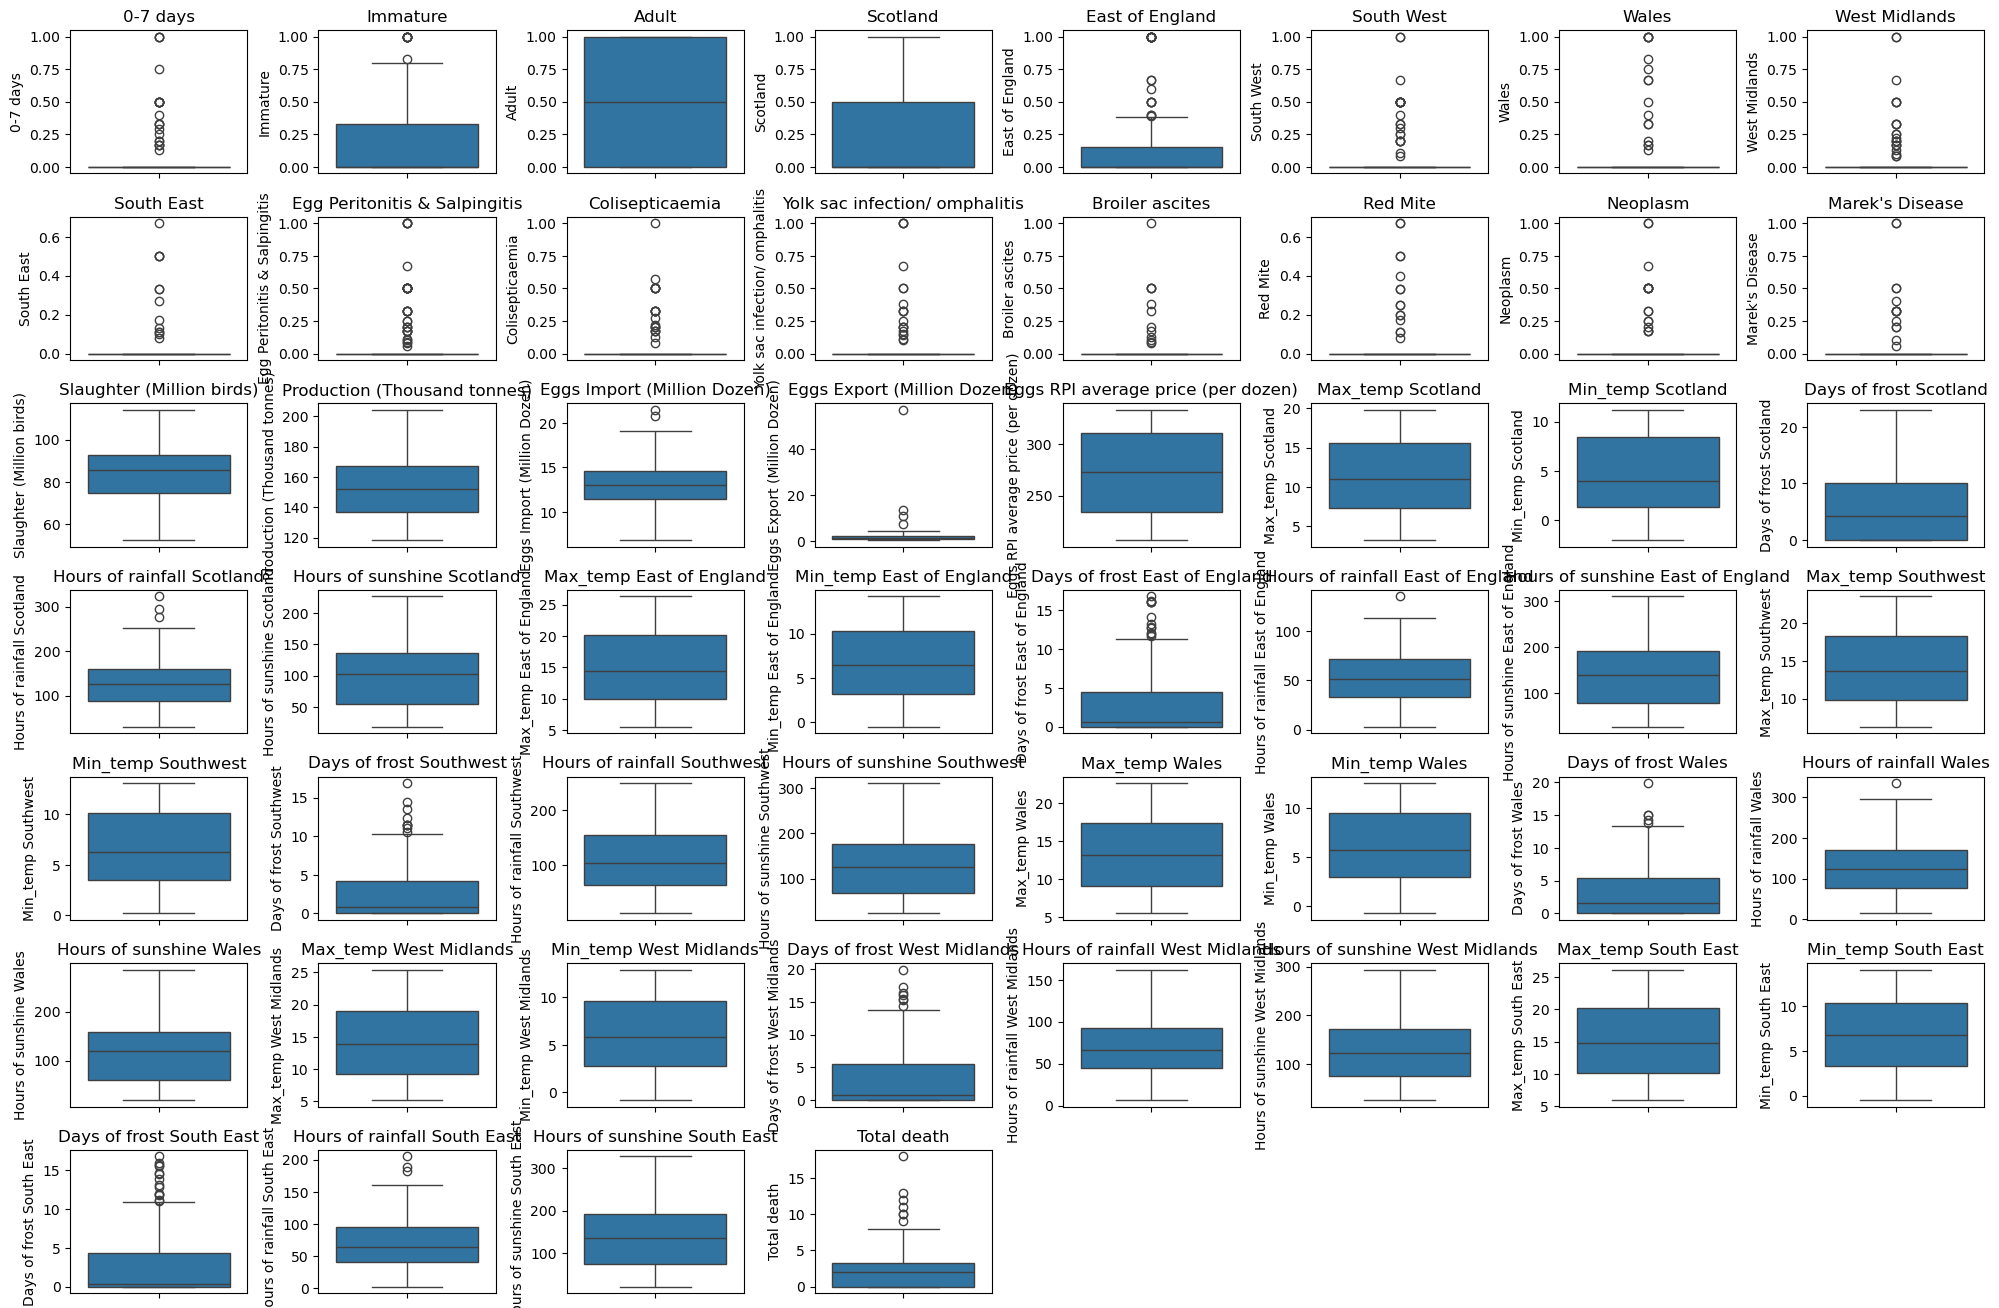

In [106]:
# Visualize distributions to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns[3:56], 1):
    plt.subplot(8, 8, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Correlation Analysis

##### Correlation visualization

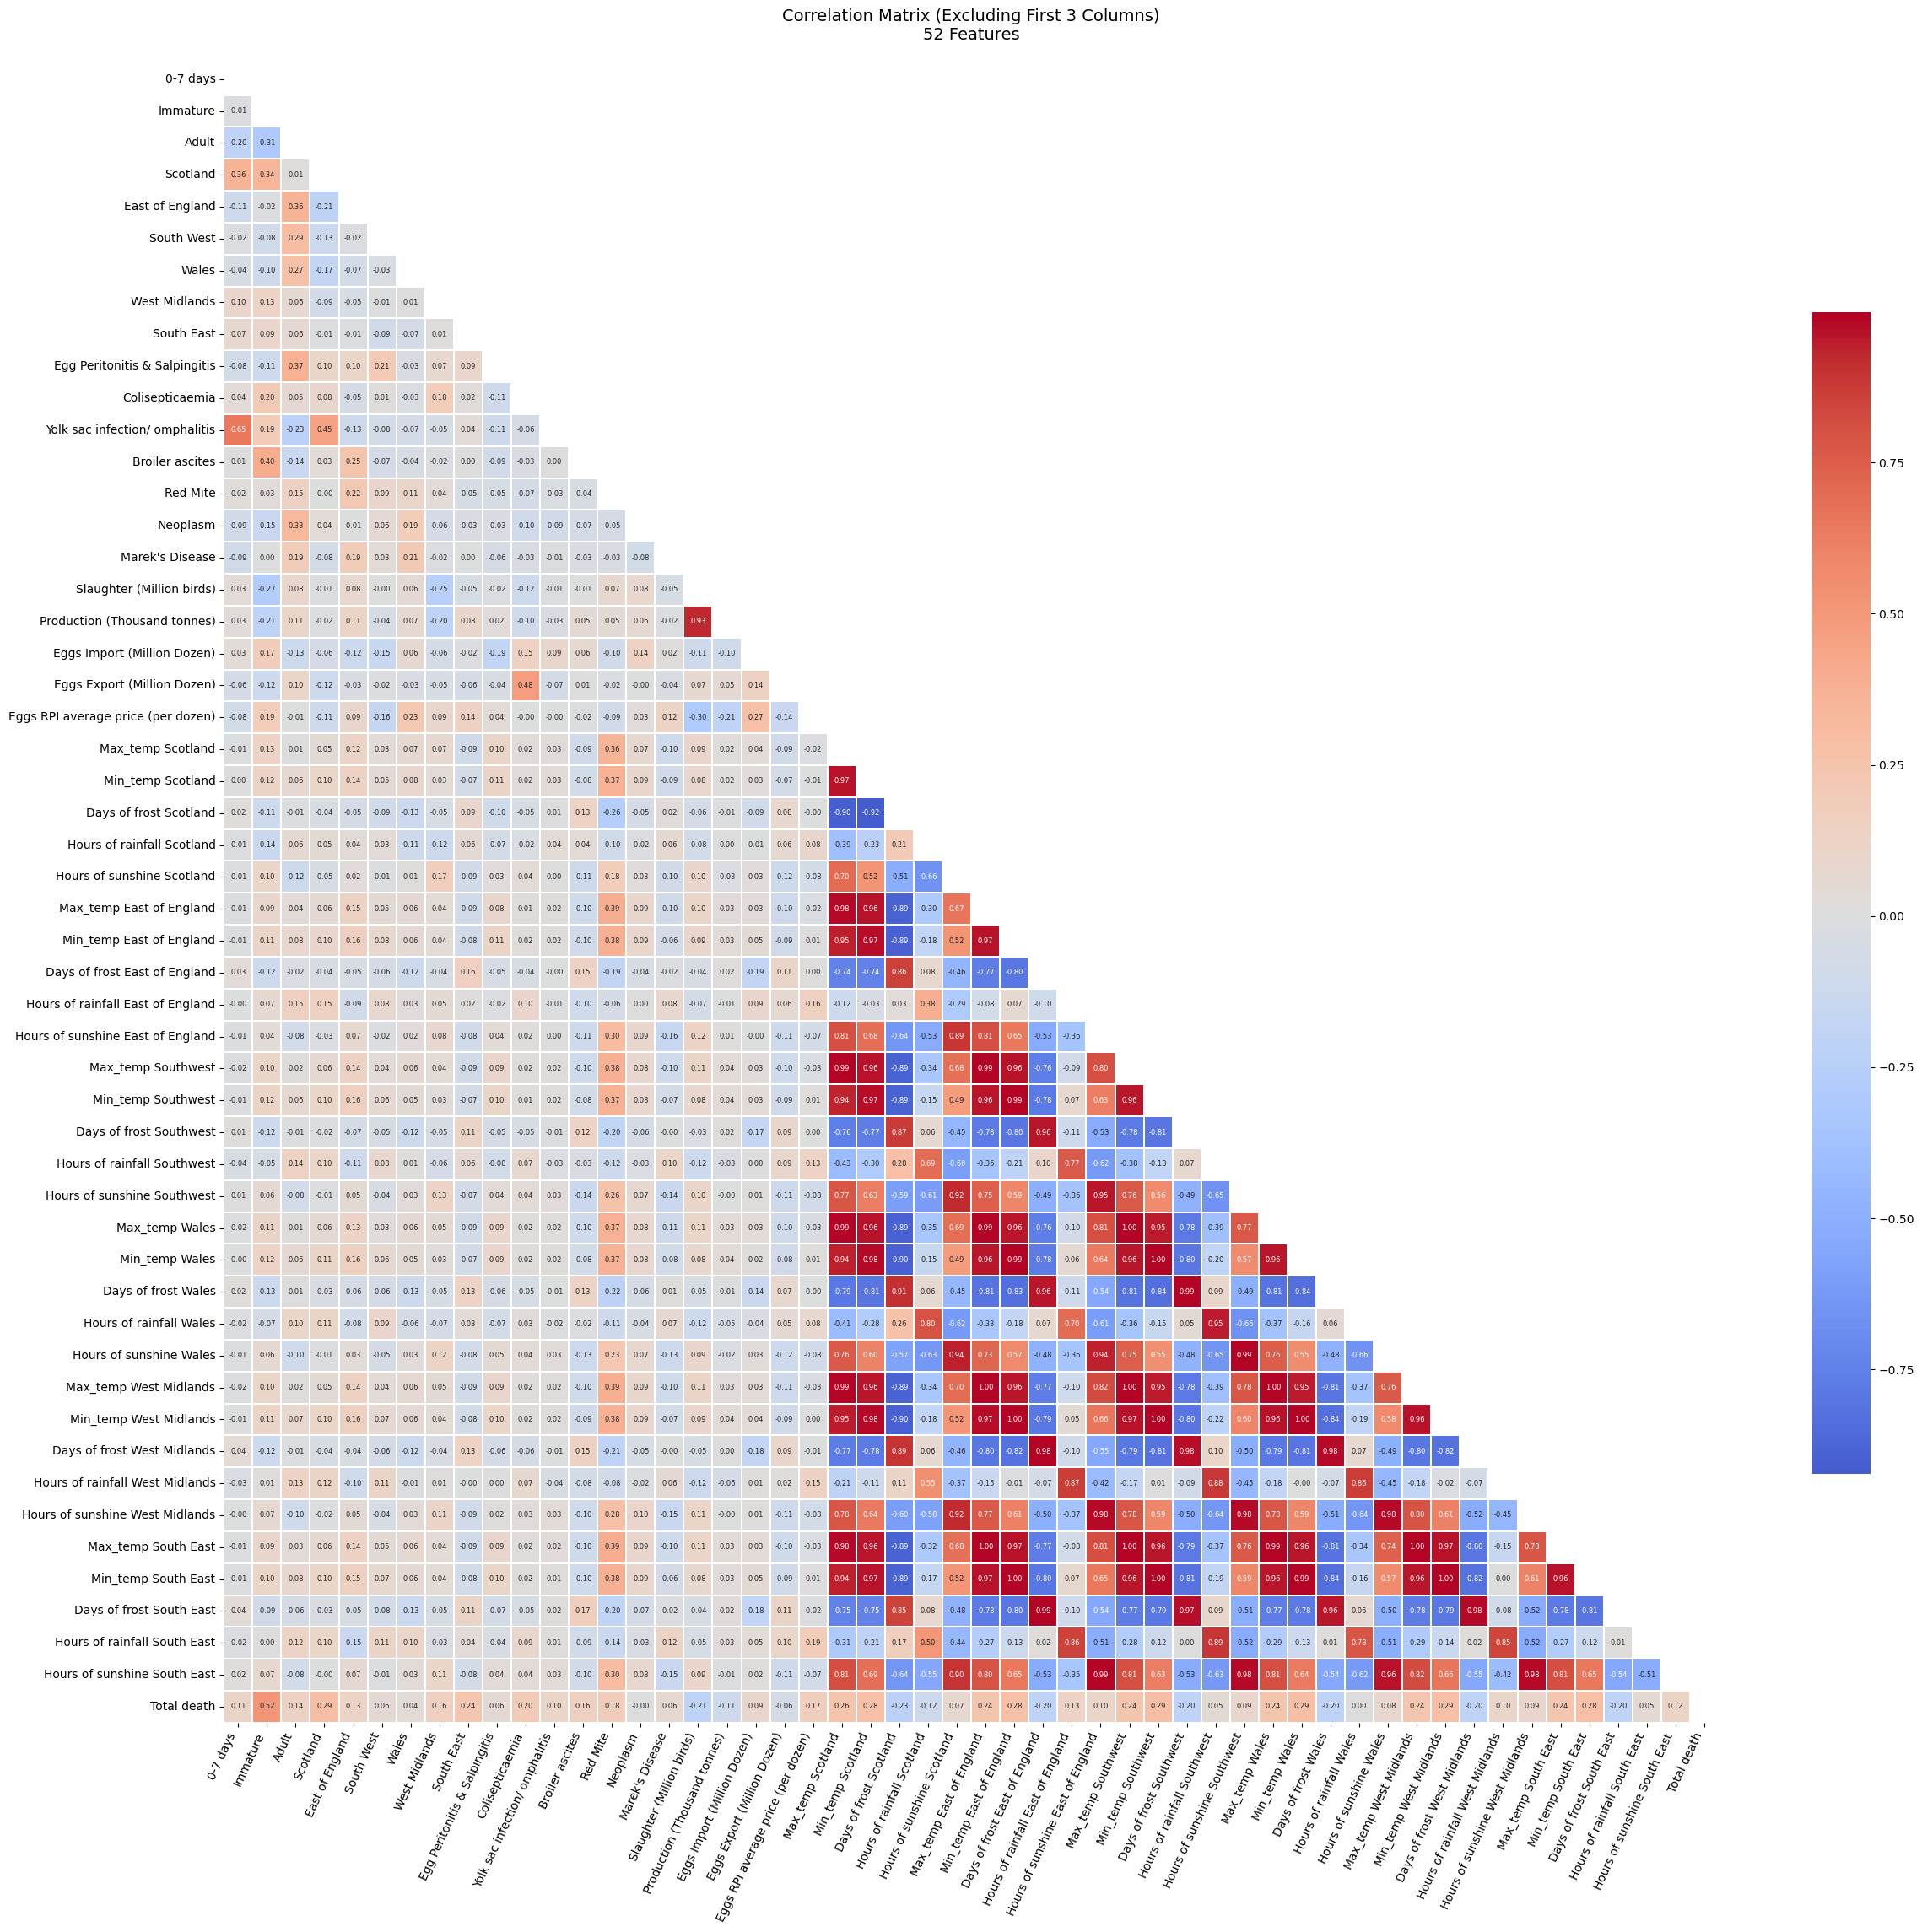

In [43]:
def analyze_correlations_excluding(df, exclude_cols=3, correlation_threshold=0.7, figsize=(25, 23)):
    # Select numeric columns and exclude first N columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    analyzed_cols = numeric_cols[exclude_cols:]
    corr_matrix = df[analyzed_cols].corr()
    
    # Visualization with adjustments for large number of columns
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    
    # Create heatmap with adjusted parameters
    ax = sns.heatmap(corr_matrix, 
                    annot=True, 
                    cmap='coolwarm',
                    center=0,
                    fmt='.2f',
                    mask=mask,
                    annot_kws={'size': 6},
                    linewidths=0.1,
                    cbar_kws={'shrink': 0.7})
    
    # Improve readability
    plt.xticks(rotation=65, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Correlation Matrix (Excluding First {exclude_cols} Columns)\n{len(analyzed_cols)} Features', 
              pad=20, fontsize=14)
    plt.tight_layout()
    plt.show()

# Usage example (excludes first 3 columns by default):
correlation_results = analyze_correlations_excluding(df)


##### Correlation rankings between all variables

In [428]:
def correlation_rankings(df, threshold=0.5):

    # 1. Exclude first 3 columns
    numeric_cols = df.select_dtypes(include='number').columns[3:]
    temp_df = df[numeric_cols].copy()
    
    # 2. Auto-detect weather columns to exclude weather featuresbeing compared with each other
    weather_keywords = ['max', 'min', 'days of frost', 'hours']
    weather_cols = [col for col in numeric_cols 
                   if any(kw in col.lower() for kw in weather_keywords)]
    
    # 3. Calculate upper triangle of correlation matrix
    corr = temp_df.corr().abs()
    np.fill_diagonal(corr.values, np.nan)  # Ignore self-correlations
    
    # 4. Extract and filter pairs
    results = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):  # Upper triangle = no duplicates
            col1, col2 = numeric_cols[i], numeric_cols[j]
            
            # Skip weather-vs-weather pairs
            if (col1 in weather_cols) and (col2 in weather_cols):
                continue
                
            corr_value = temp_df[col1].corr(temp_df[col2])  # Preserve +/- sign
            if abs(corr_value) >= threshold:
                results.append({'Feature 1': col1, 'Feature 2': col2, 'Correlation': corr_value})
    
    # 5. Return sorted results
    return pd.DataFrame(results).sort_values('Correlation', key=abs, ascending=False)

# Usage:
results = correlation_rankings(df, threshold=0.2)
results.style.background_gradient(cmap='coolwarm', subset=['Correlation'])

,Feature 1,Feature 2,Correlation
50,Slaughter (Million birds),Production (Thousand tonnes),0.926595
2,0-7 days,Yolk sac infection/ omphalitis,0.646298
9,Immature,Total death,0.515999
27,Colisepticaemia,Eggs Export (Million Dozen),0.479370
17,Scotland,Yolk sac infection/ omphalitis,0.449184
6,Immature,Broiler ascites,0.402149
32,Red Mite,Max_temp East of England,0.394937
47,Red Mite,Max_temp South East,0.394790
43,Red Mite,Max_temp West Midlands,0.386024
35,Red Mite,Max_temp Southwest,0.380750


Slaughter (Million birds) and Production (Thousand tonnes) have a high correlation of 92.65%.

##### Calculate p-value to check which one can better explained Total death

In [345]:
# Function for single test
def chi2_test(df, predictor, target='Total death'):
    crosstab = pd.crosstab(df[predictor], df[target])
    chi2, p, dof, _ = chi2_contingency(crosstab)
    return chi2, p, dof

# Calculate both tests
slaughter_chi2, slaughter_p, slaughter_dof = chi2_test(df, 'Slaughter (Million birds)')
production_chi2, production_p, production_dof = chi2_test(df, 'Production (Thousand tonnes)')

# Print raw results
print("Slaughter vs Deaths:") 
print(f"χ²({slaughter_dof}) = {slaughter_chi2:.2f}, p = {slaughter_p:.4f}")

print("\nProduction vs Deaths:")
print(f"χ²({production_dof}) = {production_chi2:.2f}, p = {production_p:.4f}")

Slaughter vs Deaths:
χ²(1680) = 1654.89, p = 0.6642

Production vs Deaths:
χ²(2016) = 2034.82, p = 0.3798


In [374]:
def rank_death_correlations(df, death_col="Total death", top_n=10):
   
    corr_series = df.corr(numeric_only=True)[death_col]
    
    results = pd.DataFrame({
        'Feature': corr_series.index,
        'Correlation': corr_series.values
    }).drop(index=corr_series.index.get_loc(death_col)) 
    
    return {
        'raw_ranking': results.sort_values('Correlation', ascending=False).head(top_n),
        'absolute_ranking': (
            results.assign(AbsCorrelation=lambda x: np.abs(x['Correlation']))
            .sort_values('AbsCorrelation', ascending=False)
            .head(top_n)
            .drop(columns=['AbsCorrelation']))}


death_rankings = rank_death_correlations(df)
print("Top Correlations (Directional):")
display(death_rankings['raw_ranking'].round(3))

print("\nTop Correlations (Absolute Strength):")
display(death_rankings['absolute_ranking'].round(3))

Top Correlations (Directional):


,Feature,Correlation
4,Immature,0.5160
40,Min_temp Wales,0.2920
35,Min_temp Southwest,0.2910
6,Scotland,0.2900
45,Min_temp West Midlands,0.2850
25,Min_temp Scotland,0.2840
50,Min_temp South East,0.2820
30,Min_temp East of England,0.2770
24,Max_temp Scotland,0.2550
34,Max_temp Southwest,0.2430



Top Correlations (Absolute Strength):


,Feature,Correlation
4,Immature,0.5160
2,Year,-0.3350
0,No.,-0.3260
40,Min_temp Wales,0.2920
35,Min_temp Southwest,0.2910
6,Scotland,0.2900
45,Min_temp West Midlands,0.2850
25,Min_temp Scotland,0.2840
50,Min_temp South East,0.2820
30,Min_temp East of England,0.2770


Both features have p-value of more than 0.05 => There is NO strong relationship (p > 0.05) between Slaughter (Million birds) and Production (Thousand tonnes) and Total death.

##### Correlation rankings from all variables against Total death

#### Avian Mortality trends by Year

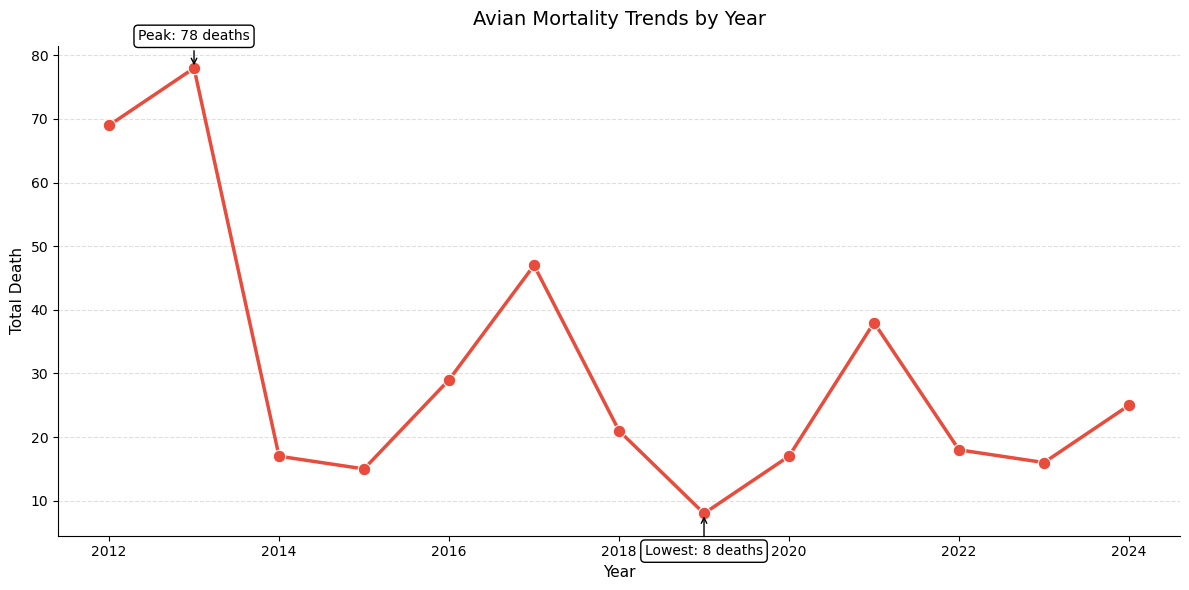

In [124]:
yearly_deaths = df.groupby('Year')['Total death'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_deaths, x='Year', y='Total death', color='#e74c3c', linewidth=2.5, marker='o', markersize=9)

ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.spines[['top', 'right']].set_visible(False)

# Find extreme points
peak = yearly_deaths.loc[yearly_deaths['Total death'].idxmax()]
lowest = yearly_deaths.loc[yearly_deaths['Total death'].idxmin()]

def annotate_point(year, death_count, label, y_offset=20):
    ax.annotate(f"{label}: {death_count:,} deaths", xy=(year, death_count), xytext=(0, y_offset), textcoords='offset points', ha='center',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3'), bbox=dict(boxstyle='round,pad=0.3', fc='white'))

annotate_point(peak['Year'], peak['Total death'], "Peak", 20)
annotate_point(lowest['Year'], lowest['Total death'], "Lowest", -30)

plt.title('Avian Mortality Trends by Year', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Total Death', fontsize=11)
plt.tight_layout()
plt.show()

#### Avian Mortality trend by Age

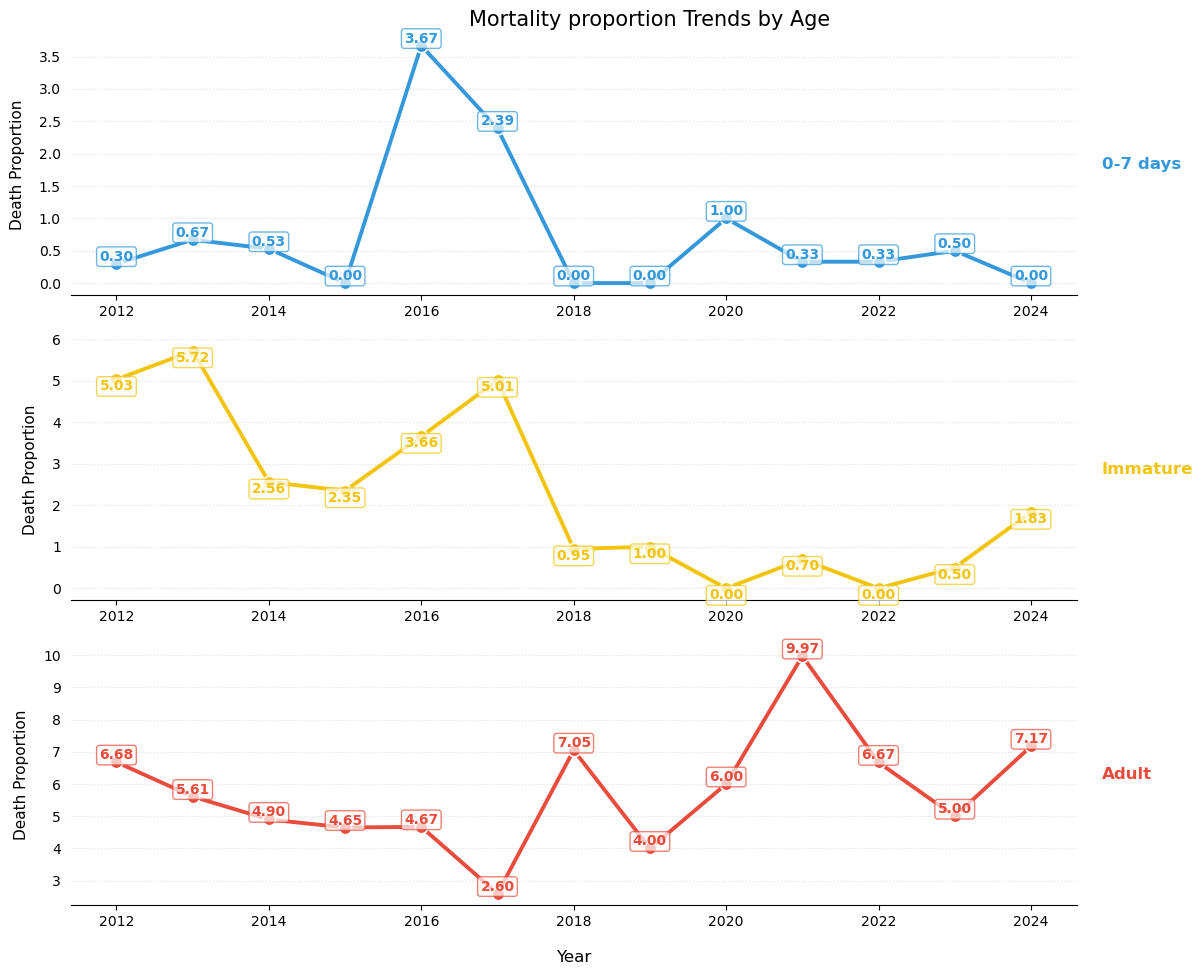

In [136]:
yearly_data = df.groupby('Year')[['0-7 days', 'Immature', 'Adult']].sum().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(13, 10))
color_palette = ['#3498db', '#f1c40f', '#e74c3c']  # Blue, Yellow, Red
label_positions = ['bottom', 'top', 'bottom']  # Strategic label alternating

for idx, age in enumerate(['0-7 days', 'Immature', 'Adult']):
    axes[idx].plot( yearly_data['Year'], yearly_data[age], color=color_palette[idx], 
                   marker='o', markersize=9, linewidth=2.8, markeredgecolor='white', markeredgewidth=1.2)
    
    for year, deaths in zip(yearly_data['Year'], yearly_data[age]):
        axes[idx].text( year, deaths,  f'{deaths:,.2f}', ha='center', va=label_positions[idx], fontsize=10,
            fontweight='semibold', color=color_palette[idx], bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor=color_palette[idx],
                alpha=0.7))
    
    axes[idx].text(1.025, 0.5, age, transform=axes[idx].transAxes, va='center', fontsize=12, fontweight='bold', color=color_palette[idx])
    
    axes[idx].spines[['top', 'right', 'left']].set_visible(False)
    axes[idx].yaxis.set_ticks_position('none')
    axes[idx].grid(axis='y', linestyle=':', alpha=0.4)
    axes[idx].set_ylabel('Death Proportion', fontsize=11, labelpad=10)

plt.xlabel('Year', fontsize=12, labelpad=15)
plt.suptitle('Mortality proportion Trends by Age', y=0.97, fontsize=15)
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

#### Avian Mortality trend by Region

##### Visualization

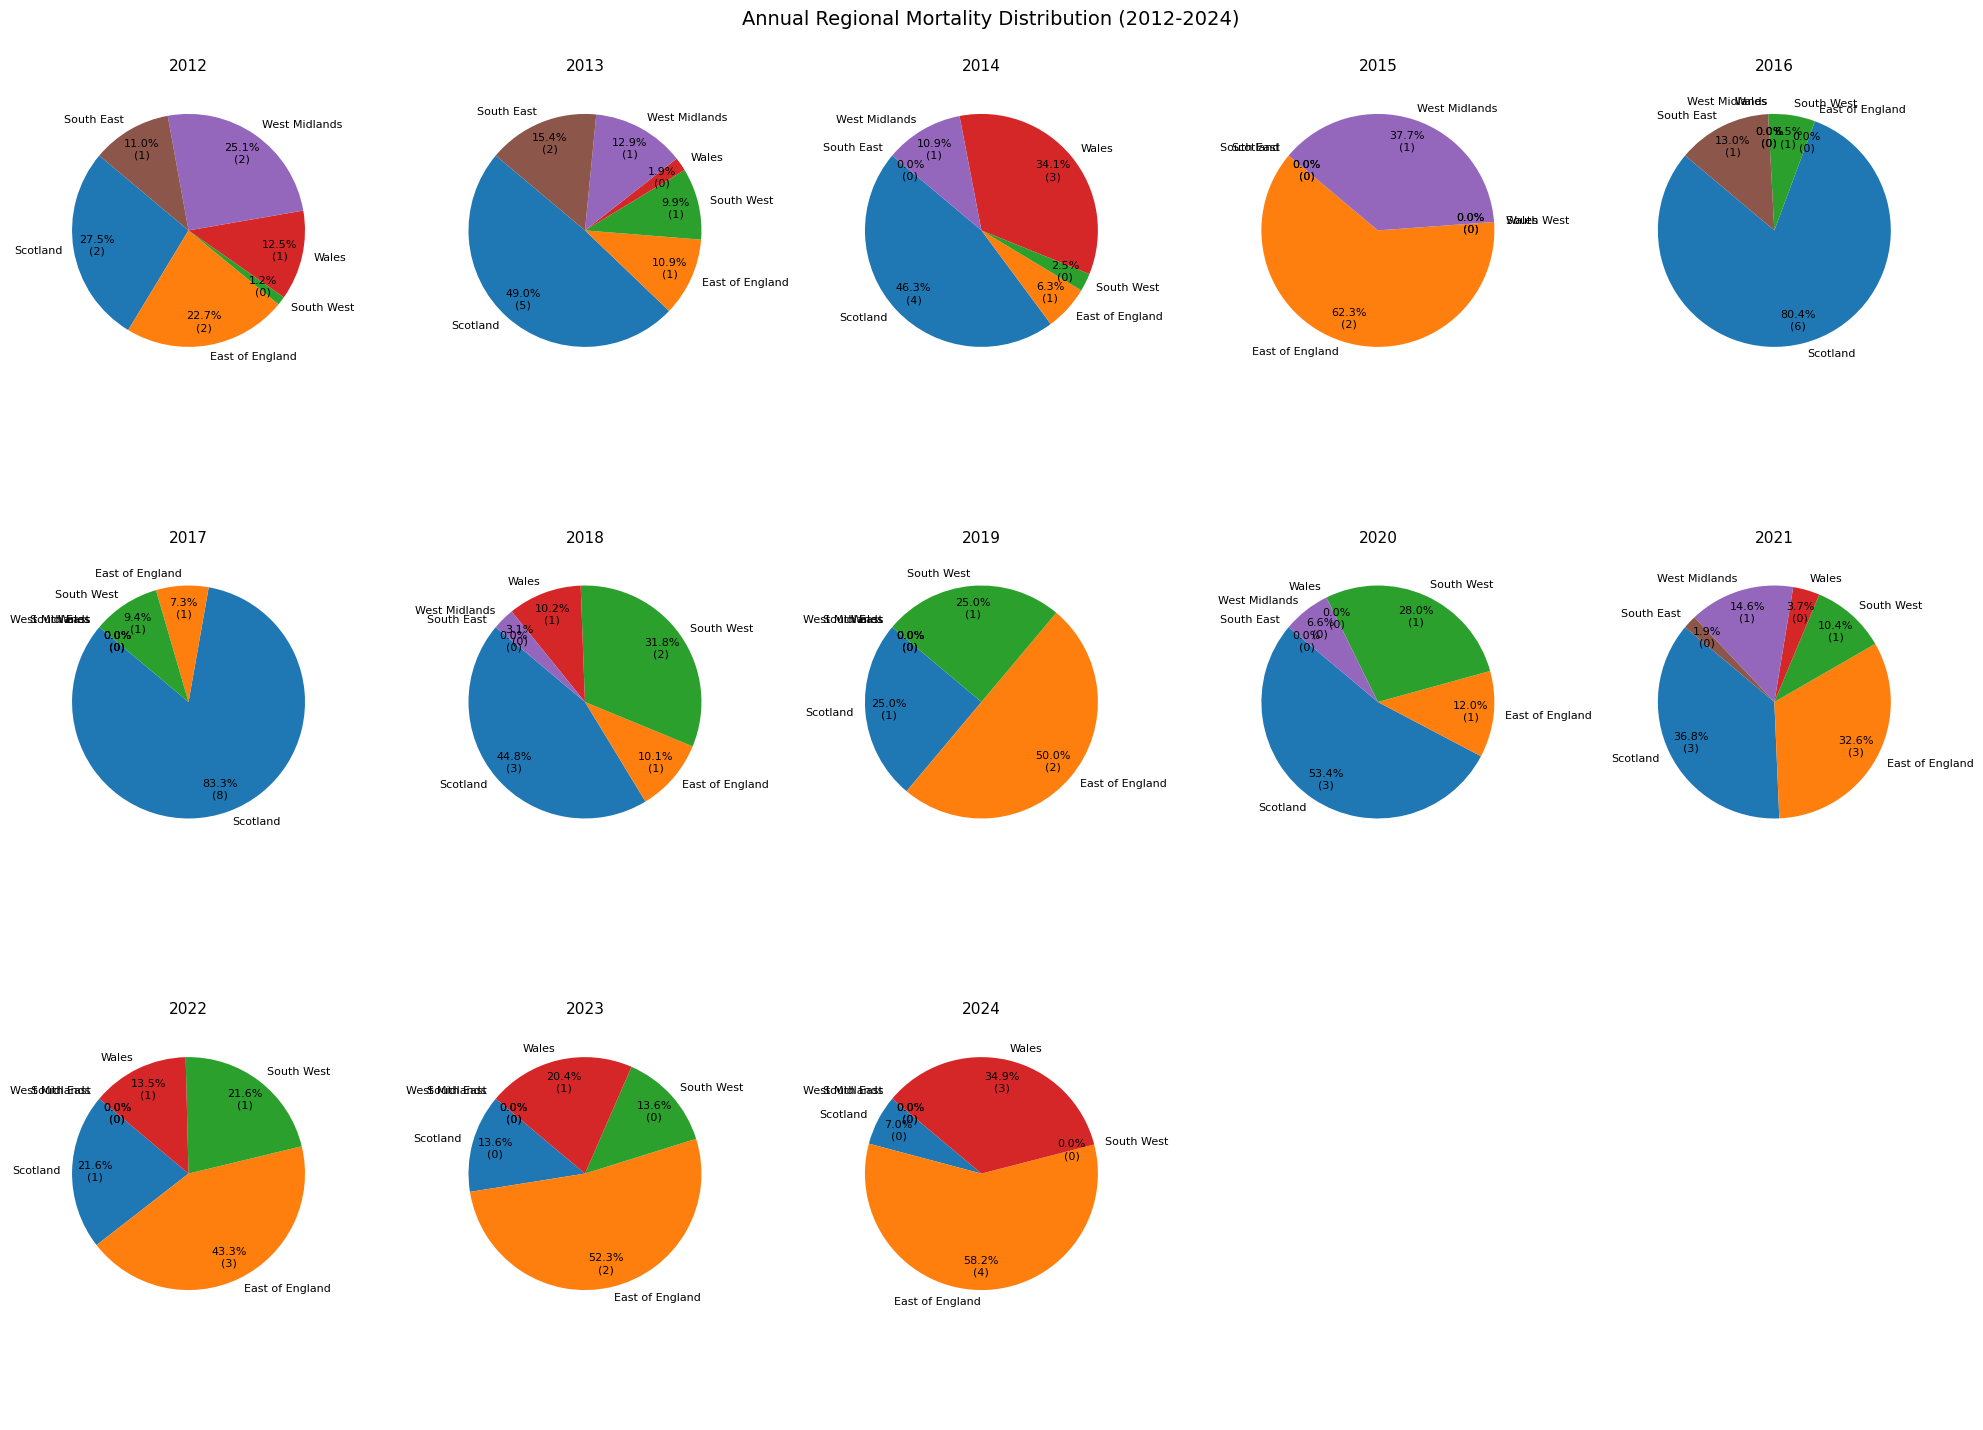

In [142]:
regions = df.columns[6:12]
year_col = 'Year'  

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

for idx, year in enumerate(range(2012, 2025)):
    yearly_data = df[df[year_col] == year][regions].sum() 
    
    def autopct_format(pct):
        total = yearly_data.sum()
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:,})'
    
    axes[idx].pie(yearly_data, labels=regions, autopct=autopct_format if yearly_data.sum() > 0 else None,
        startangle=140, pctdistance=0.8, textprops={'fontsize': 8})
    axes[idx].set_title(f'{year}', pad=10, fontsize=11)

for ax in axes[len(range(2012, 2024)):]:
    ax.axis('off')

plt.suptitle('Annual Regional Mortality Distribution (2012-2024)', y=0.95, fontsize=14)
plt.tight_layout()
plt.show()

##### Ranking by Year - Region

In [194]:
death_by_region = df.groupby('Year')[df.columns[6:12]].sum()
rankings = death_by_region.rank(axis=1, ascending=False).astype(int)

region_rank_table = rankings.T
region_rank_table['Total #1 Rankings'] = (region_rank_table == 1).sum(axis=1)  # Count years ranked #1

region_rank_table = region_rank_table.sort_values('Total #1 Rankings', ascending=False).reset_index()

display(region_rank_table.style.set_caption("Region Ranking Summary (1 = Highest Deaths)"))

Year,index,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total #1 Rankings
0,Scotland,1,1,1,4,1,1,1,2,1,1,2,3,3,8
1,East of England,3,4,4,1,5,3,4,1,3,2,1,1,1,5
2,South West,6,5,5,4,3,2,2,2,2,4,2,3,5,0
3,Wales,4,6,2,4,5,5,3,5,5,5,4,2,2,0
4,West Midlands,2,3,3,2,5,5,5,5,4,3,5,5,5,0
5,South East,5,2,6,4,2,5,6,5,5,6,5,5,5,0


##### Visualization based on Month - Region

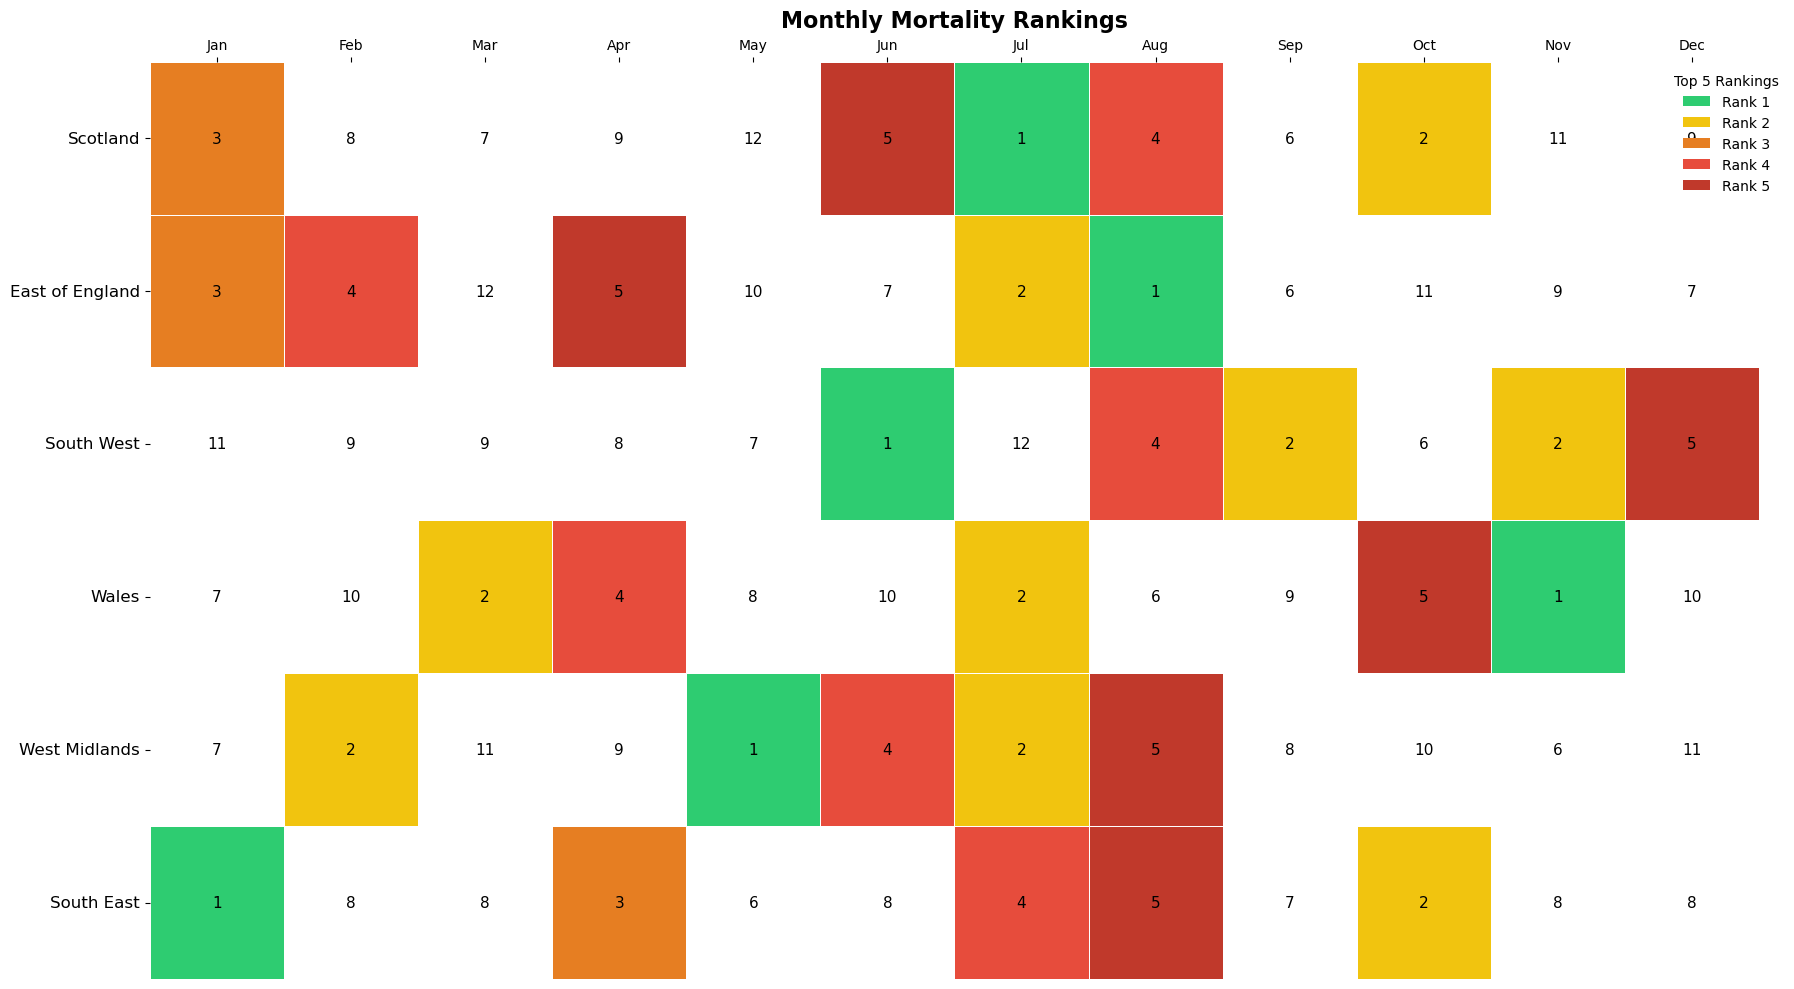

In [293]:
region_cols = df.columns[6:12]
full_ranking = pd.DataFrame(index=region_cols, columns=range(1,13), dtype='float64')

for region in region_cols:
    monthly_totals = df.groupby('Month')[region].sum()
    full_ranking.loc[region] = monthly_totals.rank(ascending=False, method='min')

full_ranking = full_ranking.fillna(12) 
full_ranking = full_ranking.astype('int64', copy=False)

top5_colors = ['#2ecc71','#f1c40f','#e67e22','#e74c3c','#c0392b']
cmap = ListedColormap(top5_colors + ['white']*7)

plt.figure(figsize=(18,10))

ax = sns.heatmap(full_ranking,cmap=['white'],annot=True,fmt='d',linewidths=0.5,linecolor='lightgray', annot_kws={'color': 'black', 'fontsize': 11},
    cbar=False)

sns.heatmap(full_ranking, cmap=cmap, annot=False, mask=full_ranking > 5, linewidths=0.5, vmin=1, vmax=12, cbar=False, ax=ax)

plt.title("Monthly Mortality Rankings", pad=25, fontsize=16, weight='bold')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.set_yticklabels(region_cols, rotation=0, fontsize=12)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=top5_colors[i], label=f'Rank {i+1}') 
    for i in range(5)
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), title='Top 5 Rankings', frameon=False)

plt.tight_layout()
plt.savefig('professional_ranking_visual.png', dpi=300, bbox_inches='tight')
plt.show()

#### Avian Mortality trend by Diagnoses

##### Visualization by Year - Diagnoses

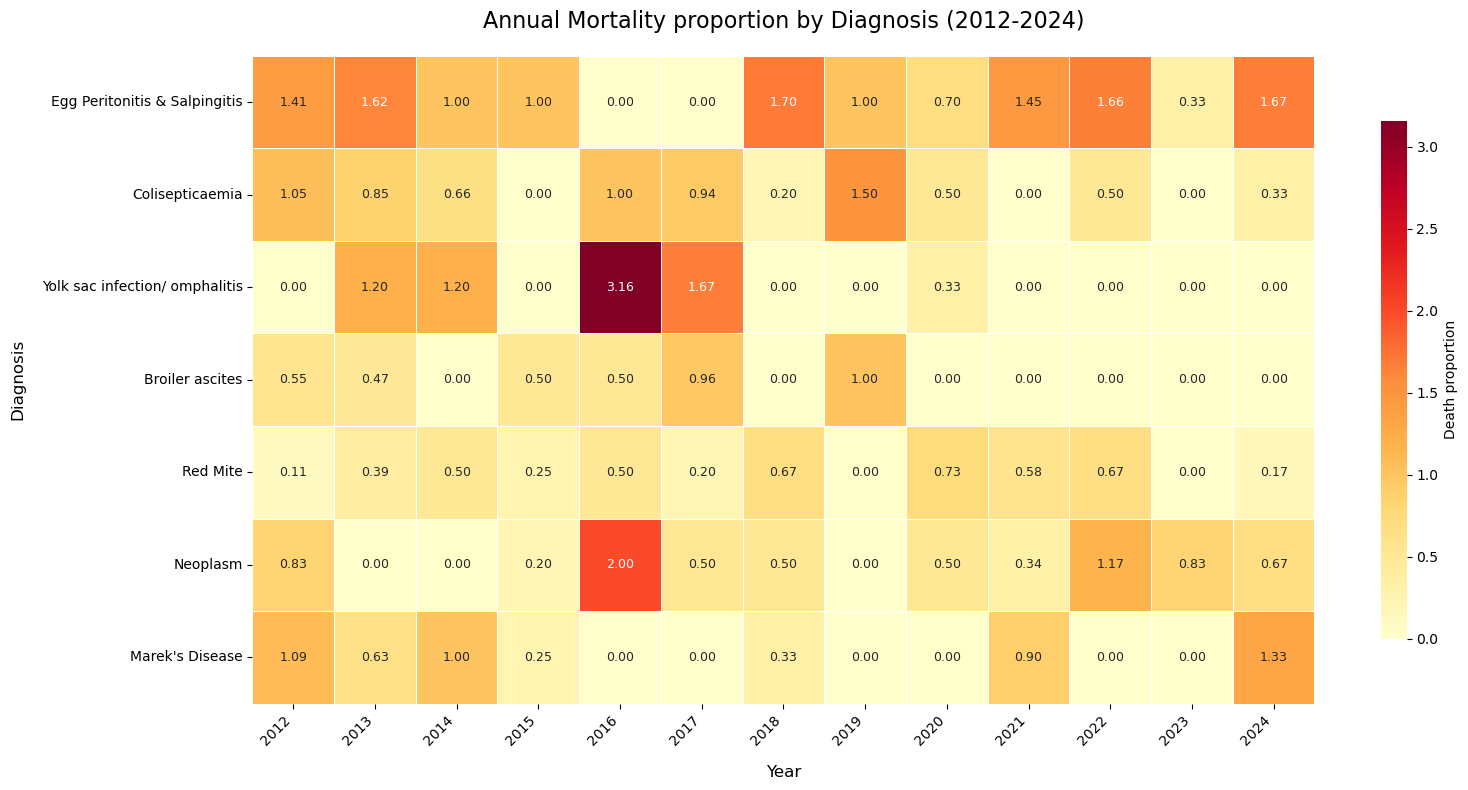

In [149]:
diagnoses = df.columns[12:19]  # Adjust if your diagnosis columns differ
heatmap_data = df.groupby('Year')[diagnoses].sum().T  

plt.figure(figsize=(16, 8))
ax = sns.heatmap(heatmap_data,annot=True,fmt=".2f", cmap="YlOrRd", linewidths=0.5, linecolor="white", 
                 annot_kws={"size": 9}, cbar_kws={"label": "Death proportion", "shrink": 0.8})

ax.set_title("Annual Mortality proportion by Diagnosis (2012-2024)", pad=20, fontsize=16)
ax.set_xlabel("Year", labelpad=12, fontsize=12)
ax.set_ylabel("Diagnosis", labelpad=12, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

##### Rankings by Year - Diagnoses

In [196]:
death_by_diagnoses = df.groupby('Year')[df.columns[12:19]].sum()
rankings = death_by_diagnoses.rank(axis=1, ascending=False).astype(int)

diagnoses_rank_table = rankings.T
diagnoses_rank_table['Total #1 Rankings'] = (diagnoses_rank_table == 1).sum(axis=1)  # Count years ranked #1

diagnoses_rank_table = diagnoses_rank_table.sort_values('Total #1 Rankings', ascending=False).reset_index()

display(diagnoses_rank_table.style.set_caption("Diagnoses Ranking Summary (1 = Highest Deaths)"))

Year,index,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total #1 Rankings
0,Egg Peritonitis & Salpingitis,1,1,2,1,6,6,1,2,2,1,1,2,1,7
1,Yolk sac infection/ omphalitis,7,2,1,6,1,1,6,5,5,6,6,5,6,3
2,Colisepticaemia,3,3,4,6,3,3,5,1,3,6,4,5,4,1
3,Red Mite,6,6,5,3,4,5,2,5,1,3,3,5,5,1
4,Neoplasm,4,7,6,5,2,4,3,5,3,4,2,1,3,1
5,Broiler ascites,5,5,6,2,4,2,6,2,6,6,6,5,6,0
6,Marek's Disease,2,4,2,3,6,6,4,5,6,2,6,5,2,0


#### Top 30 Month/Year Deadliest rate by Regions

In [236]:
region_cols = df.columns[6:12]  # Columns 7-12 (0-based index 6-11)
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

top_data = []
for region in region_cols:
    region_top = (df[['Year', 'Month', region]].sort_values(
            by=[region, 'Year', 'Month'], ascending=[False, True, True].head(30).assign(Region=region))
    
    region_top['Value'] = (
        region_top[region].astype(str) + " (" + 
        region_top['Year'].astype(str) + "-" + 
        region_top['Month'].map(month_names) + ")"
    )
    top_data.append(region_top[['Region', 'Value']])

combined = pd.concat(top_data)
combined['Rank'] = combined.groupby('Region').cumcount() + 1
final_table = (combined.pivot(index='Rank', columns='Region', values='Value').rename_axis(None, axis=1).reset_index())

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(final_table.to_string(index=False))

 Rank East of England        Scotland      South East      South West           Wales   West Midlands
    1  1.0 (2015-Jan)  1.0 (2013-Mar) 0.67 (2013-Jan)  1.0 (2018-Sep)  1.0 (2012-Mar)  1.0 (2012-May)
    2  1.0 (2019-Jan)  1.0 (2013-Dec)  0.5 (2013-Apr)  1.0 (2019-Jun)  1.0 (2014-Apr)  1.0 (2015-May)
    3  1.0 (2019-Jul)  1.0 (2014-Feb)  0.5 (2016-Jan) 0.67 (2013-May)  1.0 (2014-Nov) 0.67 (2014-May)
    4  1.0 (2021-Nov)  1.0 (2014-Jun)  0.5 (2016-Oct)  0.5 (2016-Aug)  1.0 (2024-Oct)  0.5 (2013-Feb)
    5  1.0 (2022-Jul)  1.0 (2014-Jul) 0.33 (2012-Jan)  0.5 (2017-Jun) 0.83 (2024-Jul)  0.5 (2021-Jun)
    6  1.0 (2022-Aug)  1.0 (2016-Apr) 0.33 (2012-Jul)  0.5 (2018-Mar) 0.75 (2023-Aug)  0.5 (2021-Jul)
    7  1.0 (2023-Sep)  1.0 (2016-May) 0.27 (2013-Oct)  0.5 (2020-Oct) 0.67 (2018-Jul) 0.33 (2012-Feb)
    8  1.0 (2024-Feb)  1.0 (2016-Jul) 0.17 (2021-May)  0.5 (2020-Nov) 0.67 (2024-Mar) 0.33 (2013-May)
    9  1.0 (2024-Apr)  1.0 (2016-Sep) 0.13 (2012-Sep)  0.5 (2021-Feb)  0.5 (2022-N

In [242]:
# Function to get the sub-dataset from above date
region_tables = {}

for region in region_cols:
    # STEP 1: Get indices of top 30 months with tie-breaking logic
    top_indices = (
        df[['Year', 'Month', region]]
        .sort_values(
            by=[region, 'Year', 'Month'],  # Hierarchy: deaths → year → month
            ascending=[False, True, True]  # Deaths↓, Year↑, Month↑
        )
        .head(30)
        .index  # Get the original row indices
    )
    
    # STEP 2: Filter using exact indices (preserves all columns)
    region_df = (
        df.loc[top_indices]
        .assign(Period=lambda x: x['Year'].astype(str) + '-' + x['Month'].map(month_names))
        .sort_values([region, 'Year', 'Month'], ascending=[False, True, True])
        .reset_index(drop=True)
    )
    
    # STEP 3: Add ranking (now respects the full sort order)
    region_df.insert(0, 'Rank', range(1, len(region_df)+1))
    region_tables[region] = region_df

In [245]:
region_tables['Scotland'].head()

,Rank,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death,month_year,Date,Period
0,1,15,3,2013,0.0,0.00,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,69.5,121.6,12.5,0.9,306,4.2,-1.6,21.5,51.6,86.2,5.7,0.1,16.8,53.1,66.8,6.4,0.2,16.9,91.0,94.6,5.5,-0.7,19.9,88.1,99.7,5.2,-0.8,19.9,65.1,77.7,6.4,0.4,15.7,70.3,66.8,2,3-2013,2013-03-01,2013-Mar
1,2,24,12,2013,0.0,0.67,0.33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.67,0.0,0.0,0.0,0.33,67.6,126.5,12.6,0.8,308,7.6,2.5,7.0,295.5,21.7,9.3,2.5,2.9,59.2,62.4,9.7,3.5,2.8,217.0,44.5,9.1,3.3,3.4,224.9,37.8,9.2,2.6,2.2,89.6,57.4,9.8,2.8,4.6,161.3,53.9,3,12-2013,2013-12-01,2013-Dec
2,3,26,2,2014,0.0,0.33,0.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33,0.00,0.0,0.0,0.0,0.00,69.2,127.7,11.1,1.0,316,6.2,1.4,8.0,221.5,55.4,9.7,3.4,0.4,73.5,102.2,8.7,3.3,1.0,225.7,85.3,7.8,3.1,1.9,241.6,73.8,8.6,2.9,1.8,108.6,83.9,9.8,3.7,0.1,146.9,97.1,3,2-2014,2014-02-01,2014-Feb
3,4,30,6,2014,0.0,0.00,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,70.1,125.2,11.7,1.0,301,16.7,9.2,0.0,67.6,121.9,20.5,10.3,0.0,37.6,211.1,19.6,10.3,0.0,60.3,236.8,18.8,9.5,0.0,57.5,220.2,19.9,10.1,0.0,51.4,194.9,20.9,10.6,0.0,37.5,241.7,1,6-2014,2014-06-01,2014-Jun
4,5,31,7,2014,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.00,89.0,158.5,12.3,0.9,309,19.1,10.1,0.0,86.2,191.8,23.8,13.4,0.0,58.4,229.0,21.7,12.3,0.0,43.4,246.0,20.8,11.5,0.0,57.1,232.5,23.0,12.0,0.0,48.6,247.8,24.0,13.1,0.0,45.8,269.1,1,7-2014,2014-07-01,2014-Jul


### Inferential Analysis

#### Distribution Testing

##### Distribution visualisation

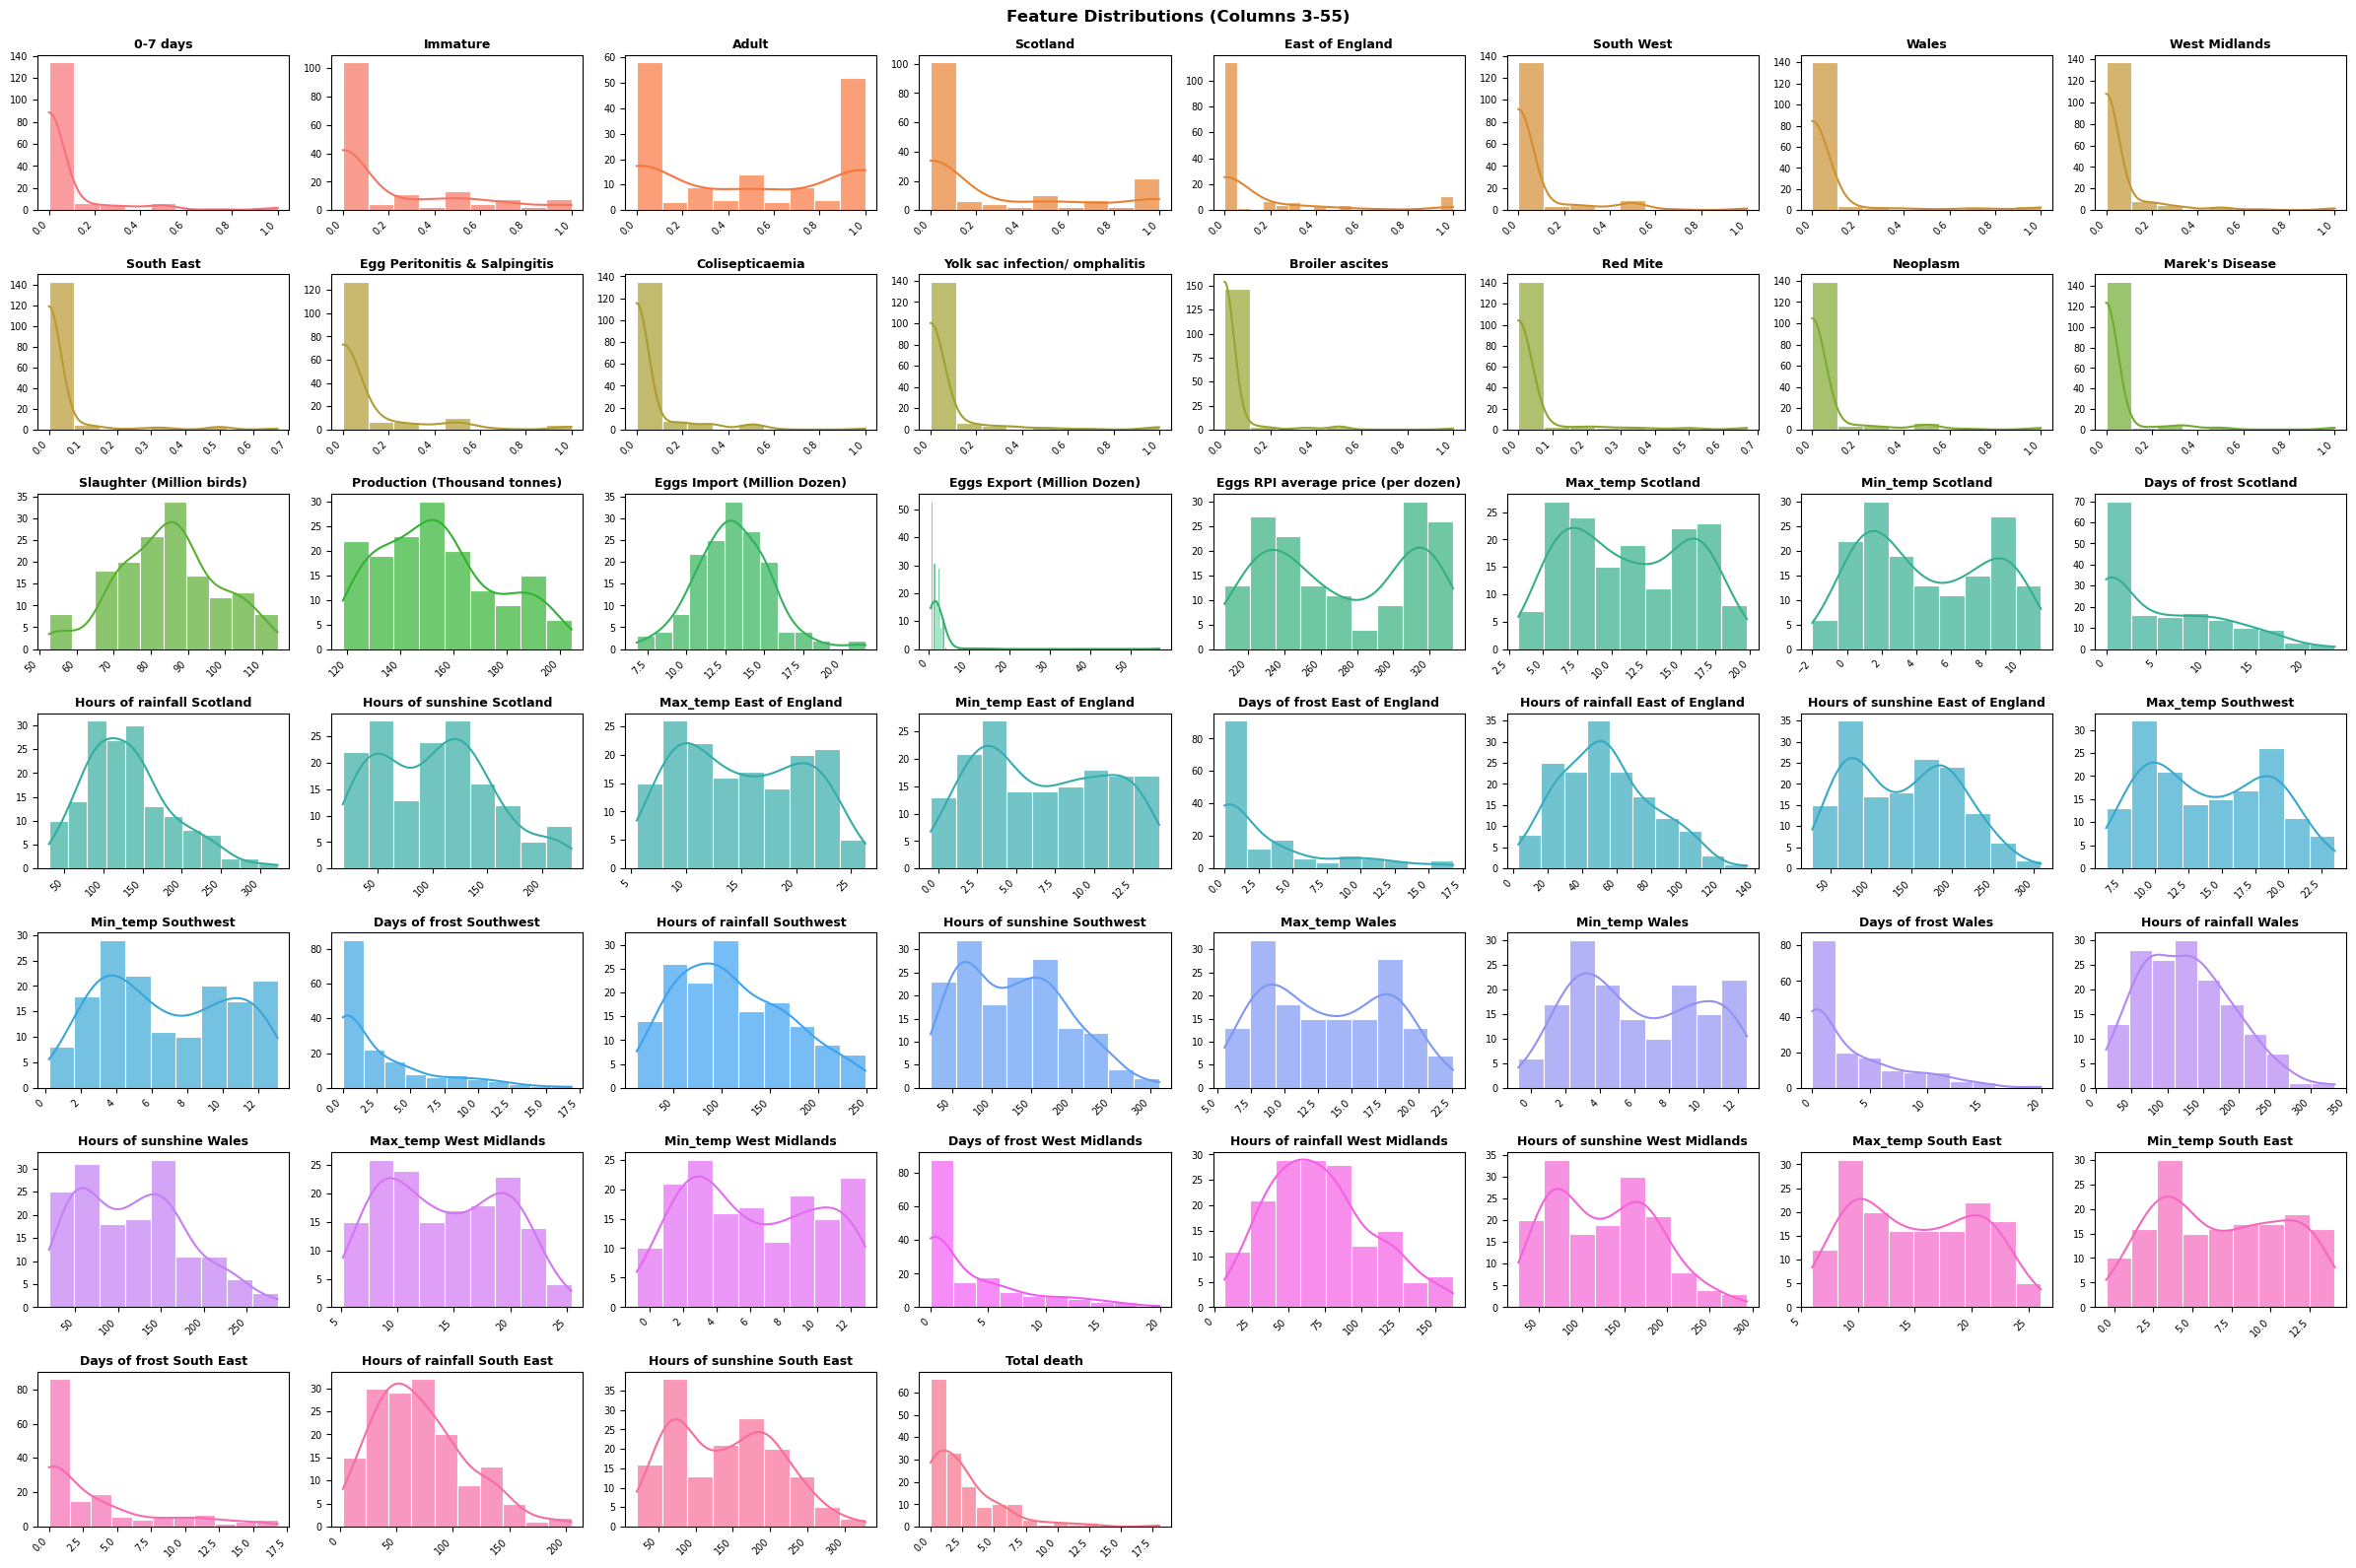

In [68]:
# Check distribution for all columns

plt.figure(figsize=(24, 16))
plt.subplots_adjust(hspace=0.6, wspace=0.3) 

num_cols = df.select_dtypes(include=np.number).columns[3:55]

palette = sns.color_palette("husl", len(num_cols))

for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(7, 8, i)  # 7 rows x 8 columns = 56 positions (more than enough)
    
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)], linewidth=0.8, edgecolor='white', alpha=0.7)
    
    ax.set_title(col, fontsize=9, pad=5, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelsize=7)
    
    plt.xticks(rotation=45, ha='right', fontsize=7)
    
for j in range(i, 56):
    plt.delaxes(plt.subplot(7, 8, j+1))

plt.suptitle('Feature Distributions (Columns 3-55)', y=0.99, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

From histogram above: Eggs Imported, Slaughter, Hours of rainfall (East of England)  have a rather normal distribution.
However, we will generate a table using p-value to determine the normality for more accuracy.

##### Distribution based on p-value

In [112]:
def normality_test(data, alpha=0.05):
    """Returns normality decision and p-value"""
    clean_data = data.dropna()
    if len(clean_data) < 3:
        return ("N/A", np.nan)  # Not enough data
    _, p = st.shapiro(clean_data)
    decision = "Normal" if p > alpha else "Non-normal"
    return (decision, p)

# Calculate results for all numeric columns
test_results = df.select_dtypes(include=np.number).apply(normality_test)

# Split into separate DataFrames
normality_df = pd.DataFrame({
    'Normality': test_results.apply(lambda x: x[0]),
    'p-value': test_results.apply(lambda x: x[1])
}).T  # Transpose to get features as columns

# Style with conditional formatting
def highlight_normality(row):
    styles = []
    for val in row:
        if isinstance(val, str):
            if val == "Normal":
                styles.append('background-color: #DFF0D8; color: #3C763D')
            elif val == "Non-normal":
                styles.append('background-color: #F2DEDE; color: #A94442')
            else:
                styles.append('background-color: #F5F5F5; color: #666')
        else:  # p-values
            styles.append('font-family: monospace')
    return styles

styled_df = (
    normality_df.style
    .apply(highlight_normality, axis=1)
    .format({'p-value': "{:.4e}"}, na_rep="N/A")
    .set_caption("Normality Analysis")
)

# Display
display(styled_df)

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death
Normality,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Normal,Non-normal,Normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal
p-value,0.000057,0.000004,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061082,0.000100,0.084767,0.000000,0.000000,0.000004,0.000001,0.000000,0.000355,0.000287,0.000021,0.000003,0.000000,0.023030,0.000078,0.000015,0.000002,0.000000,0.000994,0.000167,0.000013,0.000002,0.000000,0.009225,0.000115,0.000026,0.000002,0.000000,0.003465,0.000234,0.000018,0.000007,0.000000,0.000180,0.000124,0.000000


Only Slaughter and Eggs Import are normally distributed.

#### Confidence Intervals

In [330]:
def safe_median_ci(df, start_col=3, end_col=55, ci=0.95, n_samples=1000):

    results = pd.DataFrame(index=['Median', 'CI_Lower', 'CI_Upper', 'Valid_N'],
                         columns=df.iloc[:, start_col:end_col+1].columns)
    
    for col in results.columns:
        try:
           sample = pd.to_numeric(df[col], errors='coerce').dropna().values
            n = len(sample)
            results.loc['Valid_N', col] = n
            
            if n == 0:
                continue
                
            med = np.median(sample)
            results.loc['Median', col] = med
            
            if n >= 5:
                boot_medians = [
                    np.median(np.random.choice(sample, size=n, replace=True))
                    for _ in range(n_samples)
                ]
                results.loc['CI_Lower', col] = np.percentile(boot_medians, 100*(1-ci)/2)
                results.loc['CI_Upper', col] = np.percentile(boot_medians, 100*(1+ci)/2)
                
        except Exception as e:
            print(f"Skipping {col} due to error: {str(e)}")
            continue
            
    return results.apply(pd.to_numeric, errors='coerce').round(3)

safe_median_ci(df)

,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death,month_year
Median,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.650,152.250,13.0,1.3,272.500,11.000,4.00,4.200,125.25,102.850,14.400,6.500,0.6,50.95,139.350,13.65,6.300,0.85,102.850,125.45,13.150,5.750,1.55,122.150,119.55,13.95,5.8,0.750,66.35,123.000,14.800,6.750,0.4,64.450,136.55,2.0,NaN
CI_Lower,0.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.599,149.300,12.6,1.2,255.975,9.549,2.75,1.598,113.65,91.739,12.799,4.850,0.0,47.90,110.596,12.05,5.399,0.20,92.000,108.80,11.649,4.700,0.30,108.950,101.60,12.10,4.2,0.250,62.20,106.345,12.849,5.000,0.0,54.750,122.50,1.5,NaN
CI_Upper,0.0,0.0,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.300,155.751,13.2,1.9,281.500,12.400,5.50,5.950,134.45,117.150,16.201,7.851,1.4,55.50,160.609,15.30,7.600,1.70,114.356,141.95,14.500,6.951,2.50,134.754,128.30,15.40,7.1,2.254,76.10,144.500,16.450,8.051,2.2,73.461,159.70,2.0,NaN
Valid_N,156.0,156.0,156.00,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000,156.000,155.0,155.0,156.000,156.000,156.00,156.000,156.00,156.000,156.000,156.000,156.0,156.00,156.000,156.00,156.000,156.00,156.000,156.00,156.000,156.000,156.00,156.000,156.00,156.00,156.0,156.000,156.00,156.000,156.000,156.000,156.0,156.000,156.00,156.0,0.0


## Regression Models

### Simple linear regression

##### Baseline model using Median

In [378]:
target_col = 'Total death'  # REPLACE WITH YOUR COLUMN

x_target = df.drop(columns=[target_col]).values  # Features (unused but kept per your request)
y_target = df[target_col].values
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(x_target, y_target, test_size=0.4, random_state=0)

# 2. Calculate baseline (median of training data)
median_baseline = np.median(y_train_death)
y_pred_death = np.full_like(y_test_death, median_baseline)

# 3. Compute ALL requested metrics
y_range_death = y.max() - y.min()
metrics = {
    'Median_Value': median_baseline,
    'MAE': mean_absolute_error(y_test_death, y_pred_death),
    'MSE': mean_squared_error(y_test_death, y_pred_death),
    'RMSE': np.sqrt(mean_squared_error(y_test_death, y_pred_death)),
    'Normalized_RMSE': np.sqrt(mean_squared_error(y_test_death, y_pred_death)) / y_range_death,
    'R2': r2_score(y_test_death, y_pred_death)
}

results = pd.DataFrame([metrics]).round(4)
print(f"\nBaseline Metrics for '{target_col}':")
display(results)


Baseline Metrics for 'Total death':


,Median_Value,MAE,MSE,RMSE,Normalized_RMSE,R2
0,2.0000,1.9524,10.4603,3.2342,0.1797,-0.0341


##### Linear regression (using the same training/testing set)

In [395]:
numeric_cols = df.select_dtypes(include=['number']).columns[3:]

# Calculate correlations and extract top 5 for 'Total death'
top_10_features = df[numeric_cols].corr()['Total death'].drop('Total death', errors='ignore').abs().nlargest(10).index.tolist()

top_10_features

['Immature',
 'Min_temp\nWales',
 'Min_temp\nSouthwest',
 'Scotland',
 'Min_temp\nWest Midlands',
 'Min_temp\nScotland',
 'Min_temp\nSouth East',
 'Min_temp\nEast of England',
 'Max_temp\nScotland',
 'Max_temp\nSouthwest']

In [406]:
X_train, X_test, y_train_death, y_test_death = train_test_split(
    df[top_10_features],
    df['Total death'],
    test_size=0.4,
    random_state=42
)

# Initialize metrics dictionary
death_metrics = {
    'Variable': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'Normalized RMSE': [],
    'R-square': []
}

for variable in top_10_features:
    # Train model
    model = LinearRegression()
    model.fit(X_train[[variable]], y_train_death)
    
    # Get predictions
    predictions = model.predict(X_test[[variable]])
    
    # Calculate metrics 
    death_metrics['Variable'].append(variable)
    death_metrics['MAE'].append(mean_absolute_error(y_test_death, predictions))
    death_metrics['MSE'].append(mean_squared_error(y_test_death, predictions))
    death_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test_death, predictions)))
    death_metrics['Normalized RMSE'].append(
        np.sqrt(mean_squared_error(y_test_death, predictions)) / 
        (y_test_death.max() - y_test_death.min())
    )
    death_metrics['R-square'].append(r2_score(y_test_death, predictions))

# Create DataFrame and add ranking
df_metrics_death = pd.DataFrame(death_metrics).round(4)
df_metrics_death['Rank (R²)'] = df_metrics_death['R-square'].rank(ascending=False).astype(int)

# Sort by R² (best to worst)
df_metrics_death = df_metrics_death.sort_values('R-square', ascending=False).reset_index(drop=True)

display(df_metrics_death)

,Variable,MAE,MSE,RMSE,Normalized RMSE,R-square,Rank (R²)
0,Immature,1.8356,5.7546,2.3989,0.1845,0.1855,1
1,Scotland,1.8699,6.1674,2.4834,0.1910,0.1270,2
2,Min_temp\nWales,1.9786,6.3909,2.5280,0.1945,0.0954,3
3,Min_temp\nSouthwest,1.9786,6.3960,2.5290,0.1945,0.0947,4
4,Min_temp\nWest Midlands,1.9933,6.4823,2.5460,0.1958,0.0824,5
5,Min_temp\nSouth East,1.9977,6.4845,2.5465,0.1959,0.0821,6
6,Min_temp\nEast of England,2.0045,6.5299,2.5554,0.1966,0.0757,7
7,Min_temp\nScotland,2.0193,6.5971,2.5685,0.1976,0.0662,8
8,Max_temp\nSouthwest,2.0252,6.6530,2.5793,0.1984,0.0583,9
9,Max_temp\nScotland,2.0397,6.7197,2.5922,0.1994,0.0488,10


### Multiple Linear Regression

In [404]:
x_mlr = df.iloc[:, 3:54]
y_mlr = df.iloc[:,54]

# Split dataset into 60% training and 40% test sets 
# This step ensures that the statsmodels' model is trained on the same training set as scikit-learn's
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(x_mlr, y_mlr, test_size=0.4, random_state=0)

# Build a linear regression model
X_train_mlr = sm.add_constant(X_train_mlr)  # this ensure that intercept is calculated
model = sm.OLS(y_train_mlr, X_train_mlr).fit()

# Print model details
model_details = model.summary()
model_details

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total death   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     2.196
Date:                Sun, 20 Apr 2025   Prob (F-statistic):            0.00525
Time:                        19:59:56   Log-Likelihood:                -162.08
No. Observations:                  93   AIC:                             428.2
Df Residuals:                      41   BIC:                             559.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0271      8.134     -0.003      0.997     -16.454      16.400
0-7 days                               3.2403      2.783      1.165      0.251      -2.379       8.860
Immature                               4.0397      1.665      2.426      0.020       0.677       7.402
Adult                                  2.0694      1.354      1.528      0.134      -0.665       4.804
Scotland                              -0.5485      1.476     -0.372      0.712      -3.530       2.433
East of England                        0.8265      1.612      0.513      0.611      -2.429       4.083
South West                             2.1497      2.676      0.803      0.426      -3.255       7.555
Wales                                 -2.5339      3.055     -0.829      0.412      -8.704       3.636
West Midlands                         -3.3479      2.537     -1.320      0.194      -8.471       1.776
South East                             0.0879      3.116      0.028      0.978      -6.204       6.380
Egg Peritonitis & Salpingitis          0.6620      1.937      0.342      0.734      -3.251       4.575
Colisepticaemia                        4.2692      3.851      1.108      0.274      -3.509      12.047
Yolk sac infection/
omphalitis         7.8902      4.354      1.812      0.077      -0.903      16.683
Broiler ascites                       -0.9095      3.480     -0.261      0.795      -7.937       6.118
Red Mite                               0.6215      2.602      0.239      0.812      -4.633       5.876
Neoplasm                              -0.9964      2.490     -0.400      0.691      -6.025       4.032
Marek's
Disease                        1.1562      2.942      0.393      0.696      -4.785       7.097
Slaughter
(Million birds)             -0.1214      0.073     -1.669      0.103      -0.268       0.025
Production
(Thousand tonnes)           0.0688      0.040      1.717      0.094      -0.012       0.150
Eggs Import
(Million Dozen)            0.0574      0.156      0.368      0.715      -0.258       0.372
Eggs Export
(Million Dozen)            0.1611      0.222      0.726      0.472      -0.287       0.609
Eggs RPI average price (per dozen)    -0.0021      0.010     -0.206      0.838      -0.023       0.019
Max_temp
Scotland                      1.4203      1.281      1.109      0.274      -1.166       4.007
Min_temp
Scotland                     -1.3759      1.248     -1.103      0.277      -3.896       1.144
Days of frost
Scotland                -0.3311      0.285     -1.161      0.252      -0.907       0.245
Hours of rainfall
Scotland            -0.0209      0.014     -1.475      0.148      -0.049       0.008
Hours of sunshine
Scotland            -0.0393      0.029     -1.340      0.188      -0.098      

### Time series Regression

Top 10 correlating weather features:
Min_temp\nWales             0.2920
Min_temp\nSouthwest         0.2906
Min_temp\nWest Midlands     0.2851
Min_temp\nScotland          0.2840
Min_temp\nSouth East        0.2815
Min_temp\nEast of England   0.2775
Max_temp\nScotland          0.2551
Max_temp\nSouthwest         0.2432
Max_temp\nWales             0.2428
Max_temp\nEast of England   0.2426
dtype: float64
ADF Statistic: -2.5289149212011144
p-value: 0.1085965682934224
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


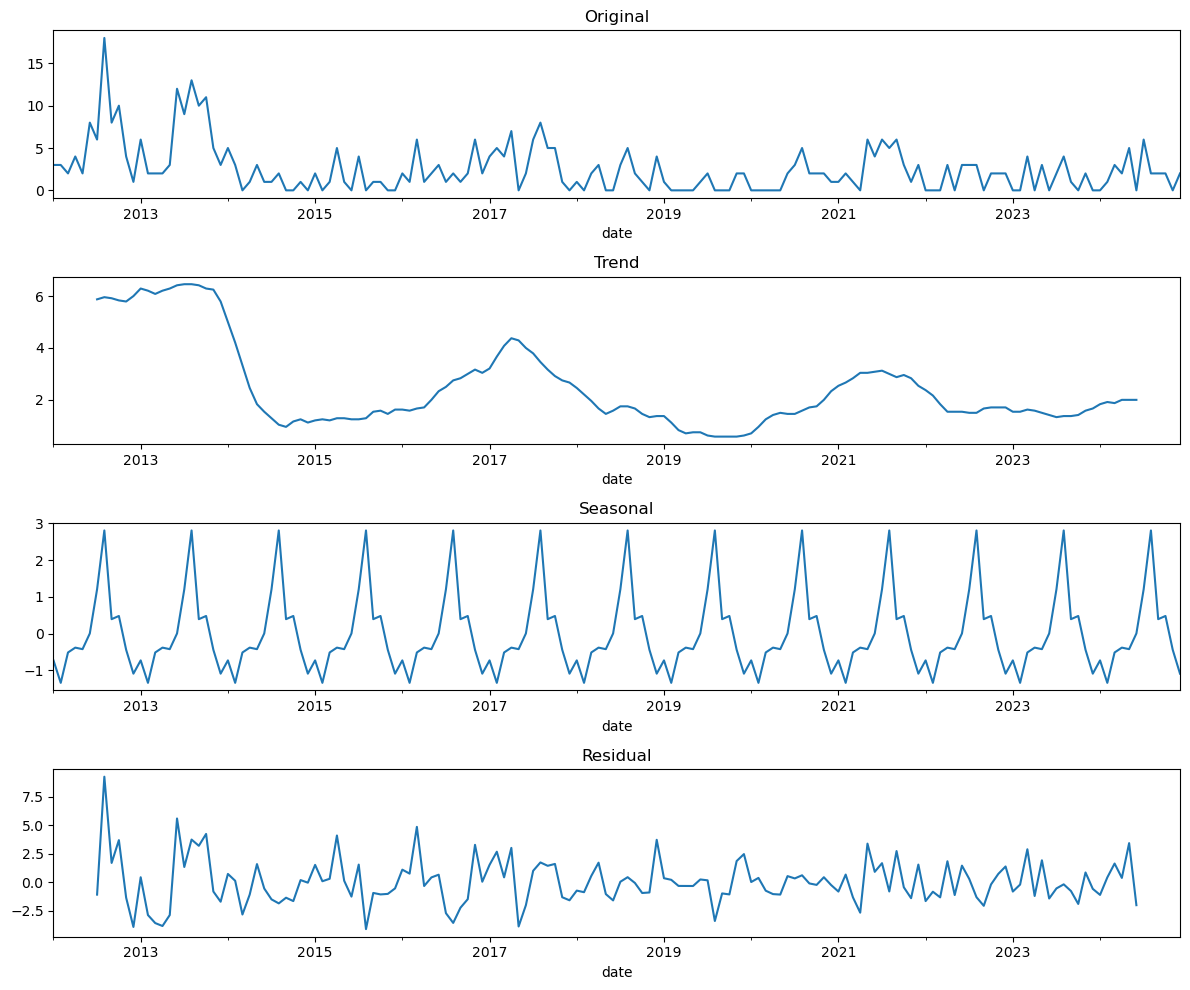

In [426]:
# Create datetime index
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df = df.set_index('date')

# Group weather-related features by region
regions = ['Scotland', 'East of England', 'South West', 'Wales', 'West Midlands', 'South East']
weather_features = {
    region: [
        f'Max_temp_{region}',
        f'Min_temp_{region}',
        f'Days of frost_{region}',
        f'Hours of rainfall_{region}',
        f'Hours of sunshine_{region}'
    ] for region in regions
}

weather_cols = [col for col in df.columns if 
                ('temp' in col.lower()) or 
                ('rain' in col.lower()) or 
                ('frost' in col.lower()) or 
                ('sunshine' in col.lower())]

# Calculate correlations with Total death
correlations = df[weather_cols].corrwith(df['Total death']).abs().sort_values(ascending=False)
print("Top 10 correlating weather features:")
print(correlations[:10])

# Select exogenous variables (example with top 5 weather features)
exog_vars = correlations[1:6].index.tolist()  # Excluding 'Total death' itself

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

check_stationarity(df['Total death'])

decomposition = seasonal_decompose(df['Total death'], period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

decomposition.observed.plot(ax=ax1, title='Original')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()

ADF Statistic: -2.528 is closer to 0 compared to critical values => non-stationary (it has trends, seasonality, or other time-dependent structure
p-value	0.108	> 0.05 → High probability the data is non-stationary.

In [427]:
# Define and fit SARIMAX model
def fit_sarimax(data, exog, order=(1,1,1), seasonal_order=(1,1,1,12)):
    model = SARIMAX(
        endog=data,
        exog=exog,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    results = model.fit()
    return results

# Prepare exogenous variables
X = df[exog_vars]

# Train-test split (80-20)
train_size = int(len(df) * 0.8)
train_data = df['Total death'][:train_size]
test_data = df['Total death'][train_size:]
train_exog = X[:train_size]
test_exog = X[train_size:]

# Fit model
model_results = fit_sarimax(
    train_data,
    train_exog,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

# Print model summary
print(model_results.summary())

C:\Users\huong\anaconda3\envs\hit140env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huong\anaconda3\envs\hit140env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Total death   No. Observations:                  124
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -226.336
Date:                            Sun, 20 Apr 2025   AIC                            472.671
Time:                                    20:44:17   BIC                            498.418
Sample:                                01-01-2012   HQIC                           483.082
                                     - 04-01-2022                                         
Covariance Type:                              opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Min_temp
Southwest           0.9876      1.174      0.841      0.400      -1.314      

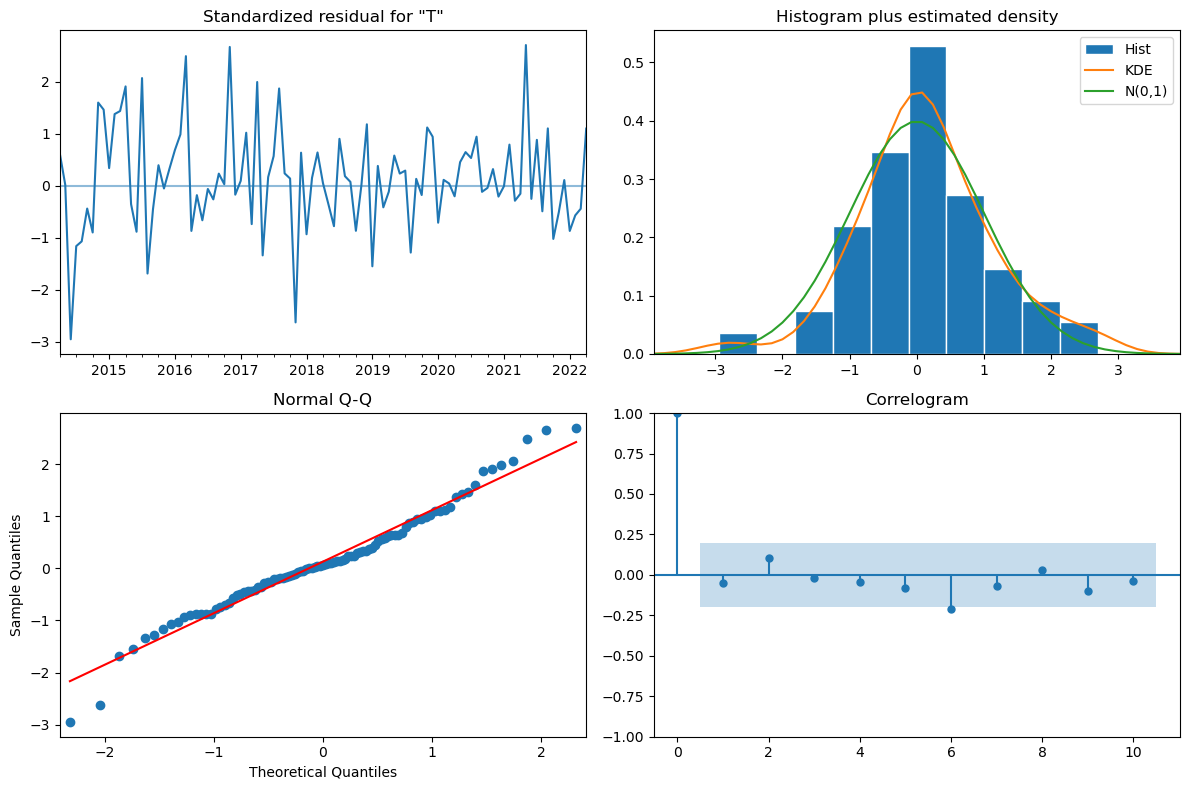

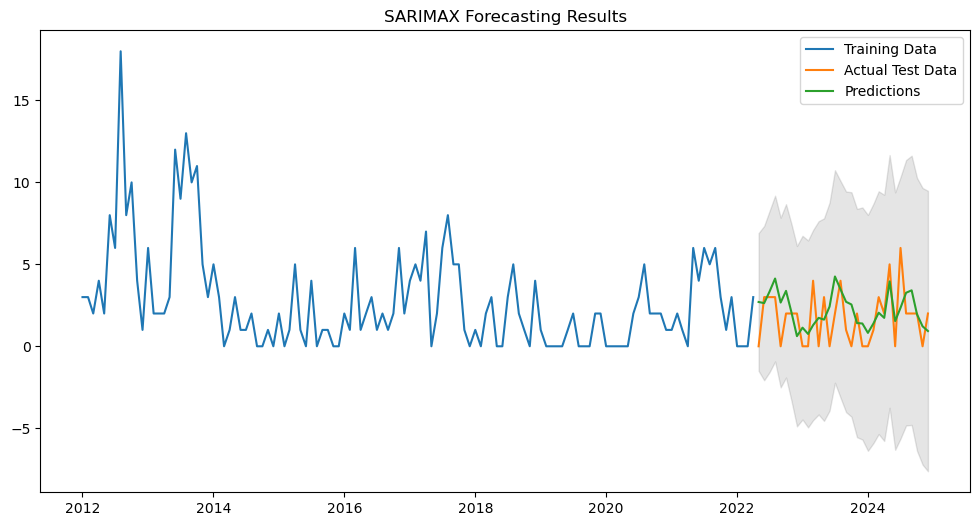

In [413]:
# Plot diagnostic plots
model_results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()

# Get predictions
predictions = model_results.get_forecast(
    steps=len(test_data),
    exog=test_exog
)

# Calculate confidence intervals
pred_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, pred_mean, label='Predictions')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.1)
plt.title('SARIMAX Forecasting Results')
plt.legend()
plt.show()

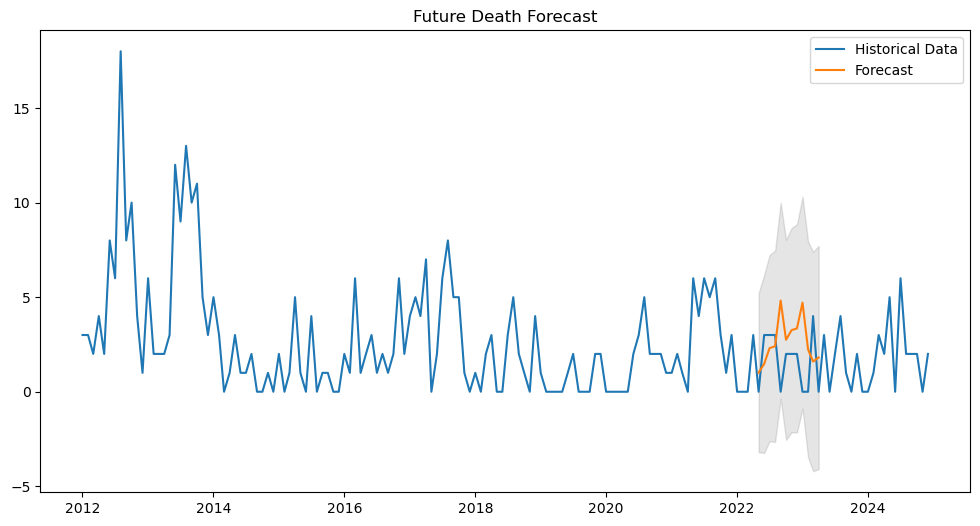

In [414]:
# For future forecasting (2024), prepare future exogenous variables
future_exog = df[exog_vars].tail(12)  # Use last 12 months pattern or your projections

# Generate forecast
future_forecast = model_results.get_forecast(steps=12, exog=future_exog)
forecast_mean = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int()

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total death'], label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=.1)
plt.title('Future Death Forecast')
plt.legend()
plt.show()